# Base Paper Implementation

## Importing Necessary Libraries

In [238]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

## Importing Data

In [118]:
df = pd.read_csv("C:\\Users\\OvaizAli\\Desktop\\FYP-2021\\FYP-I\\Master\\Data Collection\\CollectedData\\Final_Data (2022).csv", index_col = False)
# df = df.drop(columns = ['Unnamed: 0'])

In [262]:
df.head()

,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.


In [281]:
x = df[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [282]:
x.head()

,Date,Confirmed,Deaths,Recovered
0,2020-03-10,1.0,0.0,1
1,2020-03-10,2.0,0.0,2
2,2020-03-10,0.0,0.0,0
3,2020-03-10,0.0,0.0,0
4,2020-03-10,0.0,0.0,0


## Data Preparation For Model Implementation

In [283]:
# dates = np.array(x['Date'])
# dates = [datetime.strptime(date, '%y%y%y%y-%m-%d').date() for date in dates] 
# dates = [x.strftime('%d/%m/%y') for x in dates]
# dates
x['Date'] = pd.to_datetime(x['Date'])
x.sort_values('Date')
x['Date'] = x['Date'].dt.strftime('%d/%m/%y')

In [284]:
x.head(7)

,Date,Confirmed,Deaths,Recovered
0,10/03/20,1.0,0.0,1
1,10/03/20,2.0,0.0,2
2,10/03/20,0.0,0.0,0
3,10/03/20,0.0,0.0,0
4,10/03/20,0.0,0.0,0
5,10/03/20,0.0,0.0,0
6,10/03/20,2.0,0.0,2


In [285]:
dates = list(x['Date'].unique())

In [286]:
x = x.groupby(by=["Date"]).sum()

In [287]:
x.head()

,Confirmed,Deaths,Recovered
Date,,,
01/01/21,482178.0,10176.0,437229
01/01/22,1295933.0,28933.0,1191105
01/02/21,546428.0,11683.0,501252
01/02/22,1430366.0,29301.0,1314639
01/03/21,581365.0,12896.0,546371


## Ploting Imported Data

In [288]:
dates2020 = []
dates2021 = []
dates2022 = []

for date in dates:
    if(date[-2:] == '20'):
        dates2020.append(date)
    elif(date[-2:] == '21'):
        dates2021.append(date)
    elif(date[-2:] == '22'):
        dates2022.append(date)

In [289]:
dates2020.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2021.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2022.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [290]:
confirmed_pk2020 = []
confirmed_pk2021 = []
confirmed_pk2022 = []

deaths_pk2020 = []
deaths_pk2021 = []
deaths_pk2022 = []

recovered_pk2020 = []
recovered_pk2021 = []
recovered_pk2022 = []

for date in dates2020:
    confirmed_pk2020.append(x['Confirmed'][date])
    deaths_pk2020.append(x['Deaths'][date])
    recovered_pk2020.append(x['Recovered'][date])
    
for date in dates2021:
    confirmed_pk2021.append(x['Confirmed'][date])
    deaths_pk2021.append(x['Deaths'][date])
    recovered_pk2021.append(x['Recovered'][date])
    
for date in dates2022:
    confirmed_pk2022.append(x['Confirmed'][date])
    deaths_pk2022.append(x['Deaths'][date])
    recovered_pk2022.append(x['Recovered'][date])

## Year 2020

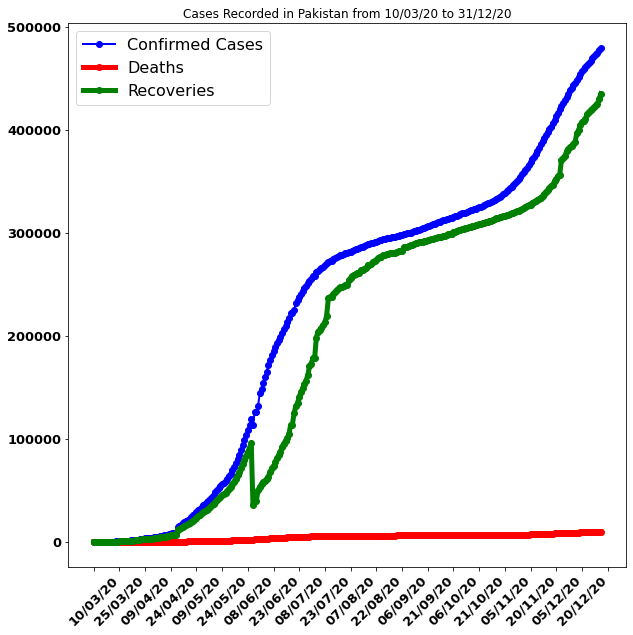

In [291]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2020,confirmed_pk2020, 'bo-', linewidth = 2)
plt.plot(dates2020,deaths_pk2020, 'ro-', linewidth = 5)
plt.plot(dates2020,recovered_pk2020, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2020[0] + ' to ' + dates2020[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Year 2021

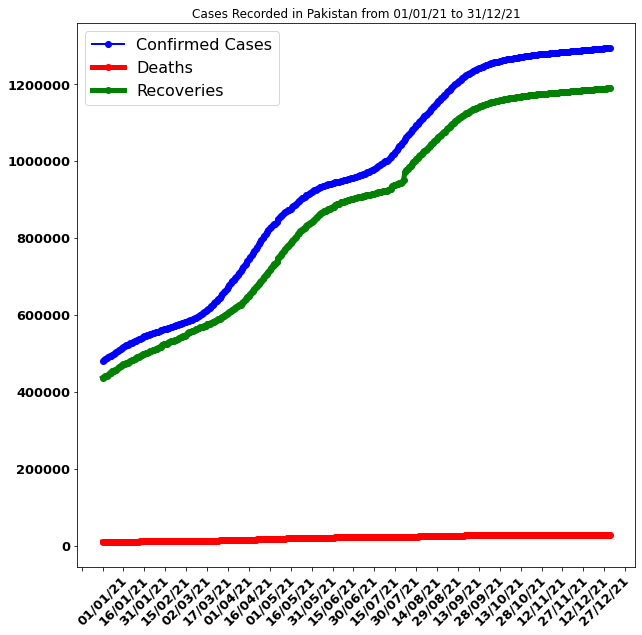

In [292]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2021,confirmed_pk2021, 'bo-', linewidth = 2)
plt.plot(dates2021,deaths_pk2021, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2021,recovered_pk2021, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2021[0] + ' to ' + dates2021[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Year 2022

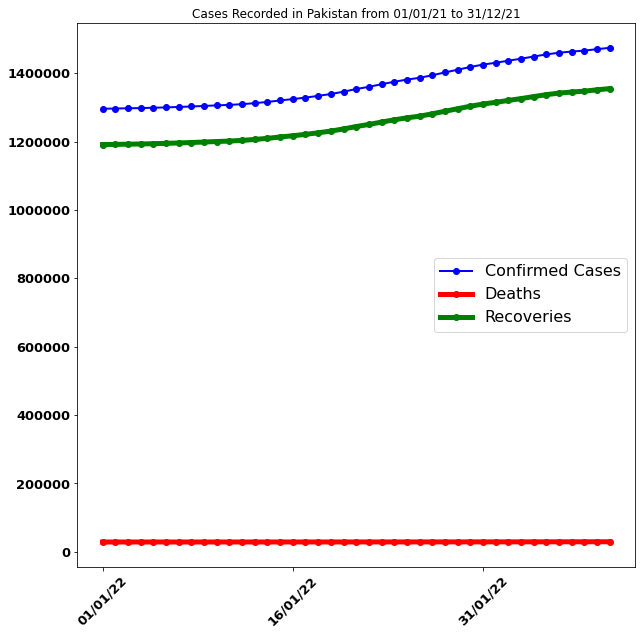

In [294]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2022,confirmed_pk2022, 'bo-', linewidth = 2)
plt.plot(dates2022,deaths_pk2022, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2022,recovered_pk2022, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2022[0] + ' to ' + dates2022[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Combined Visualization

In [295]:
dates.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [296]:
confirmed_pk = []
deaths_pk = []
recovered_pk = []

for date in dates:
    confirmed_pk.append(x['Confirmed'][date])
    deaths_pk.append(x['Deaths'][date])
    recovered_pk.append(x['Recovered'][date])

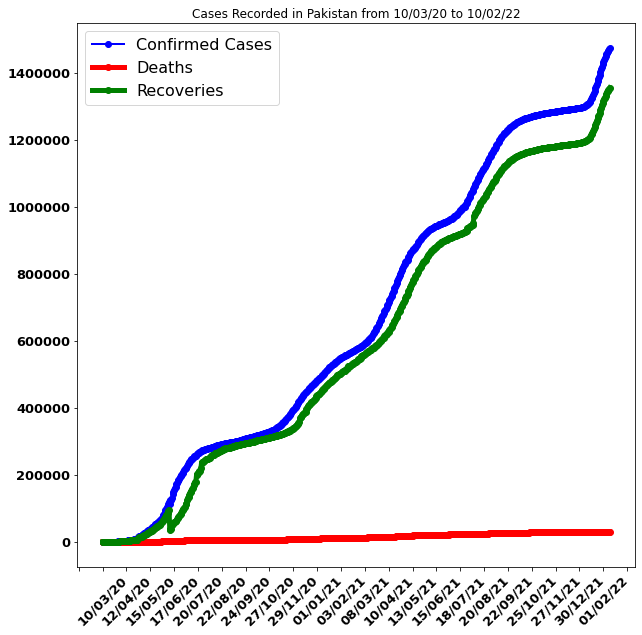

In [300]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=33.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates,confirmed_pk, 'bo-', linewidth = 2)
plt.plot(dates,deaths_pk, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates,recovered_pk, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Data Preprocessing

### Processing input data into polynomial form data

In [301]:
from sklearn.preprocessing import PolynomialFeatures

In [302]:
poly_reg = PolynomialFeatures(degree = 6)

In [303]:
input_data_simple = np.arange(0,len(x)) + 1

### Data transformed into polynomial equation upto degree mentioned above

In [304]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))

### Preparing Input and Dates into DataFrame

In [306]:
inputData_dates = pd.Series(dates, index = input_data_simple)

### Scaling

In [307]:
from sklearn.preprocessing import StandardScaler

In [308]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

## Creating Neural Network

<h4>Neural Network Design</h4>
<p>We designed a neural network with <b>one input layer, one hidden layer (with 200 neurons)</b> with <b>rectifying linear activation function</b> and <b>one output layer</b>.</p>

<h4>Optimization/Training</h4>
<p><b>Adam</b> optimizer is used to train ANN with learning rate of 1e-1 and 500 iterations are performed for training. The loss function is used as mean square error between predictions and observations.</p>

In [309]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

## Predictions on All the Cases (Confirmed, Deaths, Recovories) with Designed ANN

<p>This section has been divided into following two subsections:</p>
<ul>
    <li>In first section, the data has splitted into train/test to evaluate the model and named as <b>ann_model_for_evaluation</b>. The purpose of this section is to evaluate the performance and accuracy of model with available data. For this purpose, training data is used to train and fit the model on data and then test data is used to check the efficiency and accuracy of model.</li>
    <li>In second section, once the model has evaluated, whole data is used to train the model and then some future input data is generated to predict the cases in future.</li>
</ul>

## 1 - Evaluating Model on Train Test Splitted Data

#### Splitting data into train-test sets

In [310]:
from sklearn.model_selection import train_test_split

In [312]:
confirmed_pk = np.array(confirmed_pk)
deaths_pk = np.array(deaths_pk)
recovered_pk = np.array(recovered_pk)

In [313]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)

In [314]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

#### Transforming into tensors of input-output data for ANN

In [315]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

#### Creating instance of proposed ANN model

In [316]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

#### A model summary about layers shapes and number of paramaters/weights is given below

In [317]:
ann_model_for_evaluation.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


#### Selection of best epochs (during experiments) and training/fitting of proposed ANN model on training data

In [318]:
best_epochs = 4000

In [319]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Epoch 1/4000
21/21 [==============================] - 1s 2ms/step - loss: 396375425024.0000 - mean_absolute_error: 428778.5625
Epoch 2/4000
21/21 [==============================] - 0s 2ms/step - loss: 391795933184.0000 - mean_absolute_error: 424468.7812
Epoch 3/4000
21/21 [==============================] - 0s 2ms/step - loss: 380202188800.0000 - mean_absolute_error: 416254.4688
Epoch 4/4000
21/21 [==============================] - 0s 2ms/step - loss: 360795471872.0000 - mean_absolute_error: 403112.3125
Epoch 5/4000
21/21 [==============================] - 0s 2ms/step - loss: 334086963200.0000 - mean_absolute_error: 384972.3438
Epoch 6/4000
21/21 [==============================] - 0s 2ms/step - loss: 302452375552.0000 - mean_absolute_error: 363964.2188
Epoch 7/4000
21/21 [==============================] - 0s 2ms/step - loss: 269412712448.0000 - mean_absolute_error: 339823.5938
Epoch 8/4000
21/21 [==============================] - 0s 2ms/step - loss: 237741981696.0000 - mean_absolute_err

21/21 [==============================] - 0s 2ms/step - loss: 127030927360.0000 - mean_absolute_error: 261020.8750
Epoch 66/4000
21/21 [==============================] - 0s 2ms/step - loss: 127009890304.0000 - mean_absolute_error: 260913.7031
Epoch 67/4000
21/21 [==============================] - 0s 2ms/step - loss: 127030779904.0000 - mean_absolute_error: 260921.8125
Epoch 68/4000
21/21 [==============================] - 0s 2ms/step - loss: 127018213376.0000 - mean_absolute_error: 260891.2500
Epoch 69/4000
21/21 [==============================] - 0s 2ms/step - loss: 127114862592.0000 - mean_absolute_error: 260898.9531
Epoch 70/4000
21/21 [==============================] - 0s 2ms/step - loss: 127053201408.0000 - mean_absolute_error: 261006.3281
Epoch 71/4000
21/21 [==============================] - 0s 2ms/step - loss: 127011258368.0000 - mean_absolute_error: 261185.3750
Epoch 72/4000
21/21 [==============================] - 0s 2ms/step - loss: 126970232832.0000 - mean_absolute_error: 26

21/21 [==============================] - 0s 2ms/step - loss: 126699020288.0000 - mean_absolute_error: 261029.7812
Epoch 192/4000
21/21 [==============================] - 0s 2ms/step - loss: 126613954560.0000 - mean_absolute_error: 261001.0000
Epoch 193/4000
21/21 [==============================] - 0s 2ms/step - loss: 126636687360.0000 - mean_absolute_error: 261112.4375
Epoch 194/4000
21/21 [==============================] - 0s 2ms/step - loss: 126722146304.0000 - mean_absolute_error: 261112.0625
Epoch 195/4000
21/21 [==============================] - 0s 2ms/step - loss: 126656356352.0000 - mean_absolute_error: 260949.0312
Epoch 196/4000
21/21 [==============================] - 0s 2ms/step - loss: 126640070656.0000 - mean_absolute_error: 260802.1094
Epoch 197/4000
21/21 [==============================] - 0s 2ms/step - loss: 126643642368.0000 - mean_absolute_error: 260952.3438
Epoch 198/4000
21/21 [==============================] - 0s 2ms/step - loss: 126619205632.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 126420852736.0000 - mean_absolute_error: 260958.9688
Epoch 318/4000
21/21 [==============================] - 0s 2ms/step - loss: 126450016256.0000 - mean_absolute_error: 261097.0000
Epoch 319/4000
21/21 [==============================] - 0s 2ms/step - loss: 126588674048.0000 - mean_absolute_error: 261247.5938
Epoch 320/4000
21/21 [==============================] - 0s 2ms/step - loss: 126450466816.0000 - mean_absolute_error: 260961.4375
Epoch 321/4000
21/21 [==============================] - 0s 2ms/step - loss: 126435540992.0000 - mean_absolute_error: 260770.9219
Epoch 322/4000
21/21 [==============================] - 0s 2ms/step - loss: 126530961408.0000 - mean_absolute_error: 261054.2500
Epoch 323/4000
21/21 [==============================] - 0s 2ms/step - loss: 126503501824.0000 - mean_absolute_error: 260932.5156
Epoch 324/4000
21/21 [==============================] - 0s 2ms/step - loss: 126621802496.0000 - mean_absolute_er

21/21 [==============================] - 0s 1ms/step - loss: 126309449728.0000 - mean_absolute_error: 260951.0000
Epoch 444/4000
21/21 [==============================] - 0s 2ms/step - loss: 126402297856.0000 - mean_absolute_error: 260676.4375
Epoch 445/4000
21/21 [==============================] - 0s 2ms/step - loss: 126321156096.0000 - mean_absolute_error: 260838.5312
Epoch 446/4000
21/21 [==============================] - 0s 2ms/step - loss: 126418771968.0000 - mean_absolute_error: 260689.7812
Epoch 447/4000
21/21 [==============================] - 0s 2ms/step - loss: 126438621184.0000 - mean_absolute_error: 261139.2344
Epoch 448/4000
21/21 [==============================] - 0s 2ms/step - loss: 126363402240.0000 - mean_absolute_error: 260986.2500
Epoch 449/4000
21/21 [==============================] - 0s 2ms/step - loss: 126298898432.0000 - mean_absolute_error: 260678.0156
Epoch 450/4000
21/21 [==============================] - 0s 2ms/step - loss: 126314102784.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 126326603776.0000 - mean_absolute_error: 260969.2188
Epoch 570/4000
21/21 [==============================] - 0s 2ms/step - loss: 126458290176.0000 - mean_absolute_error: 260678.9531
Epoch 571/4000
21/21 [==============================] - 0s 2ms/step - loss: 126324236288.0000 - mean_absolute_error: 260854.1406
Epoch 572/4000
21/21 [==============================] - 0s 2ms/step - loss: 126380253184.0000 - mean_absolute_error: 261221.5156
Epoch 573/4000
21/21 [==============================] - 0s 2ms/step - loss: 126369390592.0000 - mean_absolute_error: 261286.1875
Epoch 574/4000
21/21 [==============================] - 0s 2ms/step - loss: 126261051392.0000 - mean_absolute_error: 260822.1875
Epoch 575/4000
21/21 [==============================] - 0s 2ms/step - loss: 126297899008.0000 - mean_absolute_error: 260593.2188
Epoch 576/4000
21/21 [==============================] - 0s 2ms/step - loss: 126261026816.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 126216224768.0000 - mean_absolute_error: 260744.3438
Epoch 695/4000
21/21 [==============================] - 0s 3ms/step - loss: 126231044096.0000 - mean_absolute_error: 260791.8906
Epoch 696/4000
21/21 [==============================] - 0s 2ms/step - loss: 126208761856.0000 - mean_absolute_error: 260566.5312
Epoch 697/4000
21/21 [==============================] - 0s 2ms/step - loss: 126287314944.0000 - mean_absolute_error: 260654.0156
Epoch 698/4000
21/21 [==============================] - 0s 2ms/step - loss: 126377549824.0000 - mean_absolute_error: 261325.5781
Epoch 699/4000
21/21 [==============================] - 0s 2ms/step - loss: 126321745920.0000 - mean_absolute_error: 260926.9688
Epoch 700/4000
21/21 [==============================] - 0s 2ms/step - loss: 126315683840.0000 - mean_absolute_error: 260978.4688
Epoch 701/4000
21/21 [==============================] - 0s 2ms/step - loss: 126229938176.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 126158274560.0000 - mean_absolute_error: 260574.0625
Epoch 820/4000
21/21 [==============================] - 0s 2ms/step - loss: 126197579776.0000 - mean_absolute_error: 260866.6875
Epoch 821/4000
21/21 [==============================] - 0s 2ms/step - loss: 126319255552.0000 - mean_absolute_error: 261425.4688
Epoch 822/4000
21/21 [==============================] - 0s 2ms/step - loss: 126218117120.0000 - mean_absolute_error: 260818.1094
Epoch 823/4000
21/21 [==============================] - 0s 2ms/step - loss: 126228439040.0000 - mean_absolute_error: 260859.6875
Epoch 824/4000
21/21 [==============================] - 0s 2ms/step - loss: 126239571968.0000 - mean_absolute_error: 260626.1562
Epoch 825/4000
21/21 [==============================] - 0s 1ms/step - loss: 126244454400.0000 - mean_absolute_error: 260905.6875
Epoch 826/4000
21/21 [==============================] - 0s 2ms/step - loss: 126273691648.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 126131036160.0000 - mean_absolute_error: 260602.1719
Epoch 944/4000
21/21 [==============================] - 0s 2ms/step - loss: 126127521792.0000 - mean_absolute_error: 260622.0781
Epoch 945/4000
21/21 [==============================] - 0s 2ms/step - loss: 126279712768.0000 - mean_absolute_error: 261072.7500
Epoch 946/4000
21/21 [==============================] - 0s 2ms/step - loss: 126155571200.0000 - mean_absolute_error: 260688.9531
Epoch 947/4000
21/21 [==============================] - 0s 2ms/step - loss: 126142480384.0000 - mean_absolute_error: 260801.9219
Epoch 948/4000
21/21 [==============================] - 0s 2ms/step - loss: 126119288832.0000 - mean_absolute_error: 260701.4375
Epoch 949/4000
21/21 [==============================] - 0s 2ms/step - loss: 126139351040.0000 - mean_absolute_error: 260613.4219
Epoch 950/4000
21/21 [==============================] - 0s 2ms/step - loss: 126098653184.0000 - mean_absolute_er

21/21 [==============================] - 0s 2ms/step - loss: 126371233792.0000 - mean_absolute_error: 260781.5781
Epoch 1007/4000
21/21 [==============================] - 0s 1ms/step - loss: 126476378112.0000 - mean_absolute_error: 261327.0938
Epoch 1008/4000
21/21 [==============================] - 0s 2ms/step - loss: 126146363392.0000 - mean_absolute_error: 260979.0000
Epoch 1009/4000
21/21 [==============================] - 0s 2ms/step - loss: 126165884928.0000 - mean_absolute_error: 260676.9375
Epoch 1010/4000
21/21 [==============================] - 0s 2ms/step - loss: 126183809024.0000 - mean_absolute_error: 260656.4375
Epoch 1011/4000
21/21 [==============================] - 0s 2ms/step - loss: 126109179904.0000 - mean_absolute_error: 260807.0938
Epoch 1012/4000
21/21 [==============================] - 0s 2ms/step - loss: 126130782208.0000 - mean_absolute_error: 260717.7969
Epoch 1013/4000
21/21 [==============================] - 0s 2ms/step - loss: 126133084160.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126082867200.0000 - mean_absolute_error: 260678.0625
Epoch 1131/4000
21/21 [==============================] - 0s 2ms/step - loss: 126092107776.0000 - mean_absolute_error: 260629.7812
Epoch 1132/4000
21/21 [==============================] - 0s 2ms/step - loss: 126097276928.0000 - mean_absolute_error: 260800.2812
Epoch 1133/4000
21/21 [==============================] - 0s 2ms/step - loss: 126090264576.0000 - mean_absolute_error: 260891.4219
Epoch 1134/4000
21/21 [==============================] - 0s 2ms/step - loss: 126081302528.0000 - mean_absolute_error: 260787.2812
Epoch 1135/4000
21/21 [==============================] - 0s 2ms/step - loss: 126097129472.0000 - mean_absolute_error: 260520.6875
Epoch 1136/4000
21/21 [==============================] - 0s 2ms/step - loss: 126077796352.0000 - mean_absolute_error: 260553.6406
Epoch 1137/4000
21/21 [==============================] - 0s 2ms/step - loss: 126191943680.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126068776960.0000 - mean_absolute_error: 260709.2344
Epoch 1255/4000
21/21 [==============================] - 0s 3ms/step - loss: 126038999040.0000 - mean_absolute_error: 260910.1562
Epoch 1256/4000
21/21 [==============================] - 0s 2ms/step - loss: 126106836992.0000 - mean_absolute_error: 260690.6875
Epoch 1257/4000
21/21 [==============================] - 0s 2ms/step - loss: 126089887744.0000 - mean_absolute_error: 260624.3594
Epoch 1258/4000
21/21 [==============================] - 0s 2ms/step - loss: 126053703680.0000 - mean_absolute_error: 260545.8750
Epoch 1259/4000
21/21 [==============================] - 0s 2ms/step - loss: 126065696768.0000 - mean_absolute_error: 260822.4844
Epoch 1260/4000
21/21 [==============================] - 0s 2ms/step - loss: 126076076032.0000 - mean_absolute_error: 260631.8438
Epoch 1261/4000
21/21 [==============================] - 0s 2ms/step - loss: 126071783424.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126138728448.0000 - mean_absolute_error: 260902.5938
Epoch 1317/4000
21/21 [==============================] - 0s 2ms/step - loss: 126204231680.0000 - mean_absolute_error: 261307.0625
Epoch 1318/4000
21/21 [==============================] - 0s 2ms/step - loss: 126098825216.0000 - mean_absolute_error: 260778.5000
Epoch 1319/4000
21/21 [==============================] - 0s 2ms/step - loss: 126090297344.0000 - mean_absolute_error: 260621.2344
Epoch 1320/4000
21/21 [==============================] - 0s 2ms/step - loss: 126066417664.0000 - mean_absolute_error: 260425.5781
Epoch 1321/4000
21/21 [==============================] - 0s 2ms/step - loss: 126061281280.0000 - mean_absolute_error: 260637.8906
Epoch 1322/4000
21/21 [==============================] - 0s 2ms/step - loss: 126216921088.0000 - mean_absolute_error: 260617.5938
Epoch 1323/4000
21/21 [==============================] - 0s 2ms/step - loss: 126216855552.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126099226624.0000 - mean_absolute_error: 260824.3281
Epoch 1443/4000
21/21 [==============================] - 0s 2ms/step - loss: 126309040128.0000 - mean_absolute_error: 260833.8750
Epoch 1444/4000
21/21 [==============================] - 0s 2ms/step - loss: 126149976064.0000 - mean_absolute_error: 260698.5625
Epoch 1445/4000
21/21 [==============================] - 0s 2ms/step - loss: 126034141184.0000 - mean_absolute_error: 260980.0781
Epoch 1446/4000
21/21 [==============================] - 0s 2ms/step - loss: 126077460480.0000 - mean_absolute_error: 260809.3125
Epoch 1447/4000
21/21 [==============================] - 0s 2ms/step - loss: 126247190528.0000 - mean_absolute_error: 261277.9375
Epoch 1448/4000
21/21 [==============================] - 0s 3ms/step - loss: 126064238592.0000 - mean_absolute_error: 260899.4375
Epoch 1449/4000
21/21 [==============================] - 0s 2ms/step - loss: 126097391616.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126052671488.0000 - mean_absolute_error: 261066.9688
Epoch 1569/4000
21/21 [==============================] - 0s 2ms/step - loss: 126067671040.0000 - mean_absolute_error: 260807.4531
Epoch 1570/4000
21/21 [==============================] - 0s 2ms/step - loss: 126097129472.0000 - mean_absolute_error: 260795.4219
Epoch 1571/4000
21/21 [==============================] - ETA: 0s - loss: 145150017536.0000 - mean_absolute_error: 286070.687 - 0s 2ms/step - loss: 126177280000.0000 - mean_absolute_error: 260503.4531
Epoch 1572/4000
21/21 [==============================] - 0s 2ms/step - loss: 126096728064.0000 - mean_absolute_error: 260543.6719
Epoch 1573/4000
21/21 [==============================] - 0s 2ms/step - loss: 126117863424.0000 - mean_absolute_error: 260882.5625
Epoch 1574/4000
21/21 [==============================] - 0s 2ms/step - loss: 126042693632.0000 - mean_absolute_error: 260934.9844
Epoch 1575/4000
21/21 [=============

21/21 [==============================] - 0s 2ms/step - loss: 126116216832.0000 - mean_absolute_error: 260973.5312
Epoch 1631/4000
21/21 [==============================] - 0s 2ms/step - loss: 126067130368.0000 - mean_absolute_error: 260874.0000
Epoch 1632/4000
21/21 [==============================] - 0s 2ms/step - loss: 126065557504.0000 - mean_absolute_error: 260922.2656
Epoch 1633/4000
21/21 [==============================] - 0s 2ms/step - loss: 126068154368.0000 - mean_absolute_error: 260624.3125
Epoch 1634/4000
21/21 [==============================] - 0s 2ms/step - loss: 126113226752.0000 - mean_absolute_error: 260902.4844
Epoch 1635/4000
21/21 [==============================] - 0s 2ms/step - loss: 125990100992.0000 - mean_absolute_error: 260669.5781
Epoch 1636/4000
21/21 [==============================] - 0s 2ms/step - loss: 126026809344.0000 - mean_absolute_error: 260484.5625
Epoch 1637/4000
21/21 [==============================] - 0s 2ms/step - loss: 126203969536.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125968621568.0000 - mean_absolute_error: 260690.7656
Epoch 1757/4000
21/21 [==============================] - 0s 2ms/step - loss: 125994311680.0000 - mean_absolute_error: 260778.4375
Epoch 1758/4000
21/21 [==============================] - 0s 2ms/step - loss: 125984948224.0000 - mean_absolute_error: 260715.2031
Epoch 1759/4000
21/21 [==============================] - 0s 2ms/step - loss: 125992820736.0000 - mean_absolute_error: 260628.6719
Epoch 1760/4000
21/21 [==============================] - 0s 2ms/step - loss: 126052057088.0000 - mean_absolute_error: 260718.2188
Epoch 1761/4000
21/21 [==============================] - 0s 2ms/step - loss: 126031839232.0000 - mean_absolute_error: 260877.6719
Epoch 1762/4000
21/21 [==============================] - 0s 2ms/step - loss: 126040219648.0000 - mean_absolute_error: 260980.2031
Epoch 1763/4000
21/21 [==============================] - 0s 2ms/step - loss: 126060953600.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126002913280.0000 - mean_absolute_error: 260616.7500
Epoch 1882/4000
21/21 [==============================] - 0s 2ms/step - loss: 126050320384.0000 - mean_absolute_error: 260875.5938
Epoch 1883/4000
21/21 [==============================] - 0s 2ms/step - loss: 126130995200.0000 - mean_absolute_error: 260593.3906
Epoch 1884/4000
21/21 [==============================] - 0s 2ms/step - loss: 126090903552.0000 - mean_absolute_error: 260889.2656
Epoch 1885/4000
21/21 [==============================] - 0s 2ms/step - loss: 126008893440.0000 - mean_absolute_error: 261018.6719
Epoch 1886/4000
21/21 [==============================] - 0s 2ms/step - loss: 126074052608.0000 - mean_absolute_error: 261002.5781
Epoch 1887/4000
21/21 [==============================] - 0s 2ms/step - loss: 126048346112.0000 - mean_absolute_error: 260533.1875
Epoch 1888/4000
21/21 [==============================] - 0s 2ms/step - loss: 126101413888.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126063960064.0000 - mean_absolute_error: 260837.7031
Epoch 2008/4000
21/21 [==============================] - 0s 2ms/step - loss: 126035574784.0000 - mean_absolute_error: 260787.6719
Epoch 2009/4000
21/21 [==============================] - 0s 2ms/step - loss: 126063747072.0000 - mean_absolute_error: 260496.9062
Epoch 2010/4000
21/21 [==============================] - 0s 2ms/step - loss: 126082187264.0000 - mean_absolute_error: 260562.1875
Epoch 2011/4000
21/21 [==============================] - 0s 2ms/step - loss: 126044168192.0000 - mean_absolute_error: 260511.5469
Epoch 2012/4000
21/21 [==============================] - 0s 2ms/step - loss: 126208909312.0000 - mean_absolute_error: 261118.3750
Epoch 2013/4000
21/21 [==============================] - 0s 1ms/step - loss: 126035091456.0000 - mean_absolute_error: 260842.9375
Epoch 2014/4000
21/21 [==============================] - 0s 2ms/step - loss: 126012399616.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126023639040.0000 - mean_absolute_error: 260519.0781
Epoch 2134/4000
21/21 [==============================] - 0s 2ms/step - loss: 126009892864.0000 - mean_absolute_error: 260762.1250
Epoch 2135/4000
21/21 [==============================] - 0s 2ms/step - loss: 126079459328.0000 - mean_absolute_error: 260950.7344
Epoch 2136/4000
21/21 [==============================] - 0s 2ms/step - loss: 125961969664.0000 - mean_absolute_error: 260632.4844
Epoch 2137/4000
21/21 [==============================] - 0s 2ms/step - loss: 126079221760.0000 - mean_absolute_error: 260522.0781
Epoch 2138/4000
21/21 [==============================] - 0s 2ms/step - loss: 125922705408.0000 - mean_absolute_error: 260438.2812
Epoch 2139/4000
21/21 [==============================] - 0s 2ms/step - loss: 125990035456.0000 - mean_absolute_error: 260835.5781
Epoch 2140/4000
21/21 [==============================] - 0s 2ms/step - loss: 125977583616.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126087634944.0000 - mean_absolute_error: 260952.6094
Epoch 2259/4000
21/21 [==============================] - 0s 2ms/step - loss: 126048370688.0000 - mean_absolute_error: 260610.0625
Epoch 2260/4000
21/21 [==============================] - 0s 2ms/step - loss: 126082818048.0000 - mean_absolute_error: 260562.4219
Epoch 2261/4000
21/21 [==============================] - 0s 1ms/step - loss: 125957160960.0000 - mean_absolute_error: 260666.6250
Epoch 2262/4000
21/21 [==============================] - 0s 2ms/step - loss: 125969498112.0000 - mean_absolute_error: 260838.9375
Epoch 2263/4000
21/21 [==============================] - 0s 2ms/step - loss: 125995155456.0000 - mean_absolute_error: 260921.4062
Epoch 2264/4000
21/21 [==============================] - 0s 2ms/step - loss: 125972717568.0000 - mean_absolute_error: 260832.5312
Epoch 2265/4000
21/21 [==============================] - 0s 2ms/step - loss: 125993558016.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125970391040.0000 - mean_absolute_error: 260774.3125
Epoch 2385/4000
21/21 [==============================] - 0s 2ms/step - loss: 125951705088.0000 - mean_absolute_error: 260732.5625
Epoch 2386/4000
21/21 [==============================] - 0s 2ms/step - loss: 125967007744.0000 - mean_absolute_error: 260680.8750
Epoch 2387/4000
21/21 [==============================] - 0s 2ms/step - loss: 126026055680.0000 - mean_absolute_error: 260667.1250
Epoch 2388/4000
21/21 [==============================] - 0s 2ms/step - loss: 126012850176.0000 - mean_absolute_error: 260827.1562
Epoch 2389/4000
21/21 [==============================] - 0s 2ms/step - loss: 125969514496.0000 - mean_absolute_error: 260810.2500
Epoch 2390/4000
21/21 [==============================] - ETA: 0s - loss: 112675004416.0000 - mean_absolute_error: 247972.921 - 0s 2ms/step - loss: 126080630784.0000 - mean_absolute_error: 260664.3438
Epoch 2391/4000
21/21 [=============

21/21 [==============================] - 0s 2ms/step - loss: 126052352000.0000 - mean_absolute_error: 261100.5938
Epoch 2510/4000
21/21 [==============================] - 0s 2ms/step - loss: 125984243712.0000 - mean_absolute_error: 260629.8750
Epoch 2511/4000
21/21 [==============================] - 0s 2ms/step - loss: 126042857472.0000 - mean_absolute_error: 260571.1562
Epoch 2512/4000
21/21 [==============================] - 0s 2ms/step - loss: 125943365632.0000 - mean_absolute_error: 260651.9531
Epoch 2513/4000
21/21 [==============================] - 0s 2ms/step - loss: 125961388032.0000 - mean_absolute_error: 260460.6250
Epoch 2514/4000
21/21 [==============================] - 0s 2ms/step - loss: 126034862080.0000 - mean_absolute_error: 260628.1094
Epoch 2515/4000
21/21 [==============================] - 0s 2ms/step - loss: 126043553792.0000 - mean_absolute_error: 260761.3594
Epoch 2516/4000
21/21 [==============================] - 0s 2ms/step - loss: 125929906176.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125951959040.0000 - mean_absolute_error: 260721.9688
Epoch 2635/4000
21/21 [==============================] - 0s 2ms/step - loss: 126045134848.0000 - mean_absolute_error: 261024.3594
Epoch 2636/4000
21/21 [==============================] - 0s 2ms/step - loss: 126132240384.0000 - mean_absolute_error: 260744.7812
Epoch 2637/4000
21/21 [==============================] - 0s 2ms/step - loss: 126001332224.0000 - mean_absolute_error: 260527.2969
Epoch 2638/4000
21/21 [==============================] - 0s 2ms/step - loss: 126036672512.0000 - mean_absolute_error: 260531.0938
Epoch 2639/4000
21/21 [==============================] - 0s 2ms/step - loss: 126091673600.0000 - mean_absolute_error: 260474.6562
Epoch 2640/4000
21/21 [==============================] - 0s 2ms/step - loss: 125933092864.0000 - mean_absolute_error: 260610.9219
Epoch 2641/4000
21/21 [==============================] - 0s 2ms/step - loss: 126020034560.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126061133824.0000 - mean_absolute_error: 260539.6562
Epoch 2760/4000
21/21 [==============================] - 0s 2ms/step - loss: 125978140672.0000 - mean_absolute_error: 260848.8906
Epoch 2761/4000
21/21 [==============================] - 0s 2ms/step - loss: 125984292864.0000 - mean_absolute_error: 261054.2031
Epoch 2762/4000
21/21 [==============================] - 0s 2ms/step - loss: 125987381248.0000 - mean_absolute_error: 260498.5625
Epoch 2763/4000
21/21 [==============================] - 0s 2ms/step - loss: 125977903104.0000 - mean_absolute_error: 260523.0781
Epoch 2764/4000
21/21 [==============================] - 0s 2ms/step - loss: 126104018944.0000 - mean_absolute_error: 261014.7188
Epoch 2765/4000
21/21 [==============================] - 0s 2ms/step - loss: 126201389056.0000 - mean_absolute_error: 260644.5156
Epoch 2766/4000
21/21 [==============================] - 0s 2ms/step - loss: 125923901440.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125917487104.0000 - mean_absolute_error: 260656.7031
Epoch 2885/4000
21/21 [==============================] - 0s 2ms/step - loss: 126136885248.0000 - mean_absolute_error: 260836.2500
Epoch 2886/4000
21/21 [==============================] - 0s 2ms/step - loss: 126091452416.0000 - mean_absolute_error: 260898.3438
Epoch 2887/4000
21/21 [==============================] - 0s 2ms/step - loss: 125933101056.0000 - mean_absolute_error: 260648.0781
Epoch 2888/4000
21/21 [==============================] - 0s 2ms/step - loss: 125954547712.0000 - mean_absolute_error: 260607.6875
Epoch 2889/4000
21/21 [==============================] - 0s 2ms/step - loss: 125937016832.0000 - mean_absolute_error: 260521.5781
Epoch 2890/4000
21/21 [==============================] - 0s 2ms/step - loss: 125973061632.0000 - mean_absolute_error: 260791.1250
Epoch 2891/4000
21/21 [==============================] - 0s 2ms/step - loss: 126029553664.0000 - mean_abso

21/21 [==============================] - 0s 1ms/step - loss: 125984112640.0000 - mean_absolute_error: 260534.4531
Epoch 3010/4000
21/21 [==============================] - 0s 2ms/step - loss: 125932912640.0000 - mean_absolute_error: 260550.2812
Epoch 3011/4000
21/21 [==============================] - 0s 2ms/step - loss: 125908361216.0000 - mean_absolute_error: 260596.4844
Epoch 3012/4000
21/21 [==============================] - 0s 2ms/step - loss: 126035214336.0000 - mean_absolute_error: 260924.8750
Epoch 3013/4000
21/21 [==============================] - 0s 2ms/step - loss: 126015143936.0000 - mean_absolute_error: 260951.9844
Epoch 3014/4000
21/21 [==============================] - 0s 2ms/step - loss: 125940350976.0000 - mean_absolute_error: 260764.8125
Epoch 3015/4000
21/21 [==============================] - 0s 2ms/step - loss: 125965680640.0000 - mean_absolute_error: 260555.9531
Epoch 3016/4000
21/21 [==============================] - 0s 2ms/step - loss: 126027268096.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125929947136.0000 - mean_absolute_error: 260576.3594
Epoch 3135/4000
21/21 [==============================] - 0s 2ms/step - loss: 126001856512.0000 - mean_absolute_error: 260598.8906
Epoch 3136/4000
21/21 [==============================] - 0s 1ms/step - loss: 125946576896.0000 - mean_absolute_error: 260545.3750
Epoch 3137/4000
21/21 [==============================] - 0s 2ms/step - loss: 125914062848.0000 - mean_absolute_error: 260613.7812
Epoch 3138/4000
21/21 [==============================] - 0s 2ms/step - loss: 126052204544.0000 - mean_absolute_error: 260511.9688
Epoch 3139/4000
21/21 [==============================] - 0s 2ms/step - loss: 125893107712.0000 - mean_absolute_error: 260514.6094
Epoch 3140/4000
21/21 [==============================] - 0s 2ms/step - loss: 125947101184.0000 - mean_absolute_error: 260794.0312
Epoch 3141/4000
21/21 [==============================] - 0s 2ms/step - loss: 125960806400.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125984432128.0000 - mean_absolute_error: 260352.3906
Epoch 3260/4000
21/21 [==============================] - 0s 2ms/step - loss: 125982179328.0000 - mean_absolute_error: 260576.7500
Epoch 3261/4000
21/21 [==============================] - 0s 2ms/step - loss: 125932904448.0000 - mean_absolute_error: 260655.7812
Epoch 3262/4000
21/21 [==============================] - 0s 2ms/step - loss: 125915373568.0000 - mean_absolute_error: 260699.7344
Epoch 3263/4000
21/21 [==============================] - 0s 2ms/step - loss: 126006509568.0000 - mean_absolute_error: 260735.9531
Epoch 3264/4000
21/21 [==============================] - 0s 2ms/step - loss: 125941252096.0000 - mean_absolute_error: 260773.9062
Epoch 3265/4000
21/21 [==============================] - 0s 2ms/step - loss: 125888479232.0000 - mean_absolute_error: 260574.3750
Epoch 3266/4000
21/21 [==============================] - 0s 2ms/step - loss: 125950058496.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126069899264.0000 - mean_absolute_error: 260913.5312
Epoch 3323/4000
21/21 [==============================] - 0s 781us/step - loss: 125983596544.0000 - mean_absolute_error: 260463.7812
Epoch 3324/4000
21/21 [==============================] - 0s 781us/step - loss: 125963837440.0000 - mean_absolute_error: 260568.2344
Epoch 3325/4000
21/21 [==============================] - 0s 781us/step - loss: 126103355392.0000 - mean_absolute_error: 261209.1562
Epoch 3326/4000
21/21 [==============================] - 0s 2ms/step - loss: 125993902080.0000 - mean_absolute_error: 260599.2188
Epoch 3327/4000
21/21 [==============================] - 0s 781us/step - loss: 125959700480.0000 - mean_absolute_error: 260208.0469
Epoch 3328/4000
21/21 [==============================] - 0s 2ms/step - loss: 125899948032.0000 - mean_absolute_error: 260349.9688
Epoch 3329/4000
21/21 [==============================] - 0s 2ms/step - loss: 125929644032.0000 - m

21/21 [==============================] - 0s 2ms/step - loss: 125915619328.0000 - mean_absolute_error: 260712.4688
Epoch 3386/4000
21/21 [==============================] - 0s 2ms/step - loss: 125935919104.0000 - mean_absolute_error: 260806.3594
Epoch 3387/4000
21/21 [==============================] - 0s 2ms/step - loss: 125947658240.0000 - mean_absolute_error: 260546.1406
Epoch 3388/4000
21/21 [==============================] - 0s 2ms/step - loss: 125996867584.0000 - mean_absolute_error: 260397.1719
Epoch 3389/4000
21/21 [==============================] - 0s 2ms/step - loss: 125899005952.0000 - mean_absolute_error: 260663.6250
Epoch 3390/4000
21/21 [==============================] - 0s 2ms/step - loss: 126000889856.0000 - mean_absolute_error: 260714.2969
Epoch 3391/4000
21/21 [==============================] - 0s 2ms/step - loss: 126020182016.0000 - mean_absolute_error: 260959.2500
Epoch 3392/4000
21/21 [==============================] - 0s 2ms/step - loss: 125990060032.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125910368256.0000 - mean_absolute_error: 260731.2031
Epoch 3511/4000
21/21 [==============================] - 0s 2ms/step - loss: 125902815232.0000 - mean_absolute_error: 260783.8281
Epoch 3512/4000
21/21 [==============================] - 0s 2ms/step - loss: 126012801024.0000 - mean_absolute_error: 260574.3438
Epoch 3513/4000
21/21 [==============================] - 0s 2ms/step - loss: 125871292416.0000 - mean_absolute_error: 260558.3438
Epoch 3514/4000
21/21 [==============================] - 0s 2ms/step - loss: 125977231360.0000 - mean_absolute_error: 260569.4062
Epoch 3515/4000
21/21 [==============================] - 0s 2ms/step - loss: 125917028352.0000 - mean_absolute_error: 260791.0000
Epoch 3516/4000
21/21 [==============================] - 0s 2ms/step - loss: 126031003648.0000 - mean_absolute_error: 261007.2812
Epoch 3517/4000
21/21 [==============================] - 0s 2ms/step - loss: 125964058624.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126037573632.0000 - mean_absolute_error: 260541.7188
Epoch 3637/4000
21/21 [==============================] - 0s 2ms/step - loss: 125906501632.0000 - mean_absolute_error: 260524.2812
Epoch 3638/4000
21/21 [==============================] - 0s 2ms/step - loss: 125923115008.0000 - mean_absolute_error: 260524.0000
Epoch 3639/4000
21/21 [==============================] - 0s 2ms/step - loss: 125891510272.0000 - mean_absolute_error: 260650.3906
Epoch 3640/4000
21/21 [==============================] - 0s 2ms/step - loss: 126004428800.0000 - mean_absolute_error: 260774.3281
Epoch 3641/4000
21/21 [==============================] - 0s 2ms/step - loss: 126042202112.0000 - mean_absolute_error: 261057.3438
Epoch 3642/4000
21/21 [==============================] - 0s 2ms/step - loss: 125930258432.0000 - mean_absolute_error: 260878.6250
Epoch 3643/4000
21/21 [==============================] - 0s 2ms/step - loss: 125911736320.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 126029160448.0000 - mean_absolute_error: 260866.2969
Epoch 3761/4000
21/21 [==============================] - 0s 2ms/step - loss: 125942497280.0000 - mean_absolute_error: 260629.9688
Epoch 3762/4000
21/21 [==============================] - 0s 2ms/step - loss: 125949681664.0000 - mean_absolute_error: 260760.1250
Epoch 3763/4000
21/21 [==============================] - 0s 2ms/step - loss: 125909549056.0000 - mean_absolute_error: 260684.9062
Epoch 3764/4000
21/21 [==============================] - 0s 2ms/step - loss: 125954457600.0000 - mean_absolute_error: 260508.3125
Epoch 3765/4000
21/21 [==============================] - 0s 1ms/step - loss: 125984817152.0000 - mean_absolute_error: 260642.2500
Epoch 3766/4000
21/21 [==============================] - 0s 2ms/step - loss: 126089494528.0000 - mean_absolute_error: 261190.9531
Epoch 3767/4000
21/21 [==============================] - 0s 2ms/step - loss: 126057775104.0000 - mean_abso

21/21 [==============================] - 0s 2ms/step - loss: 125945217024.0000 - mean_absolute_error: 260696.1250
Epoch 3887/4000
21/21 [==============================] - 0s 2ms/step - loss: 126240686080.0000 - mean_absolute_error: 260502.2188
Epoch 3888/4000
21/21 [==============================] - 0s 2ms/step - loss: 126030684160.0000 - mean_absolute_error: 260939.2500
Epoch 3889/4000
21/21 [==============================] - 0s 2ms/step - loss: 125940080640.0000 - mean_absolute_error: 260855.9688
Epoch 3890/4000
21/21 [==============================] - 0s 2ms/step - loss: 125964132352.0000 - mean_absolute_error: 260470.2812
Epoch 3891/4000
21/21 [==============================] - 0s 2ms/step - loss: 125893533696.0000 - mean_absolute_error: 260436.6562
Epoch 3892/4000
21/21 [==============================] - 0s 2ms/step - loss: 126015455232.0000 - mean_absolute_error: 260849.4688
Epoch 3893/4000
21/21 [==============================] - 0s 2ms/step - loss: 125907361792.0000 - mean_abso

#### Covergence rate is plotted for neural network loss function during optimization

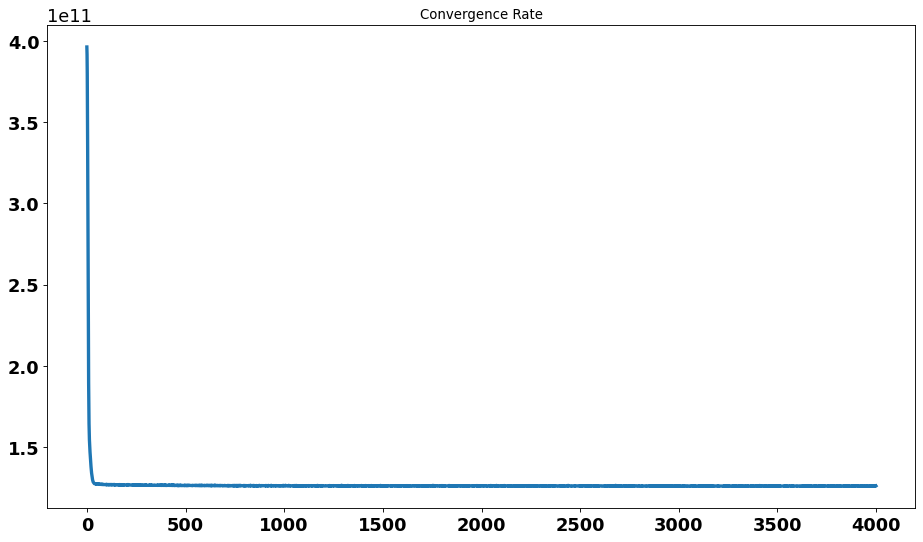

In [320]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
plt.title('Convergence Rate')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [321]:
min(fitting_amfe.history['loss'])

125850648576.0

#### Training parameters (weights and biases) values of trained ANN

In [322]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Input Layer weights: 
 [[ -4.3087544   -4.22909     -4.3476176  ...  51.463737    51.15239
   -4.24003   ]
 [-47.994057   -48.152817   -48.08939    ...  41.90569     43.38048
  -48.093464  ]
 [-32.807796   -32.551067   -32.68569    ...  24.155304    26.44234
  -32.634808  ]
 [-11.724406   -11.523495   -11.633585   ...   3.4733794    6.242359
  -11.6829195 ]
 [  0.8797423    0.8746481    0.92346644 ... -14.145644   -11.678436
    0.9104828 ]
 [  4.459273     4.341247     4.359565   ... -26.246      -23.717958
    4.4334507 ]]

 Hidden Layer 1 biases: 
 [ 56.473946  56.38923   56.531784  38.06407   56.276592  46.01641
  56.513885  46.001778  38.16479   56.299255  38.014824  56.48542
  56.613537  42.39618   46.00813   38.122437  56.568054 151.58257
  56.534885  56.522102  45.953472  56.62888   42.3841    38.17276
  45.973072  56.603973  56.555004  56.566376  56.43638   46.02363
  38.182747  56.579742  56.600025  38.07822  151.60101   45.807175
  42.413662  42.33908   56.48521   38.100716 

#### Evaluating model on train and test sets

In [323]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)

#### An evaluation report of ANN and metrics

In [324]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))
# forecasting_fitting.history.keys()

21/21 [==============================] - 0s 2ms/step - loss: 125827620864.0000 - mean_absolute_error: 260353.7500
[125827620864.0, 260353.75]
2/2 [==============================] - 0s 0s/step - loss: 131716186112.0000 - mean_absolute_error: 271866.8750
[131716186112.0, 271866.875]


<h4>Plots between Predictions and Acutal Data for Training and Test Set</h4>
<p>The graphs has been plotted for training and test sets where grpahs in first column are showing predictions and 2nd column is represeting error between predicted and actual value.
    <br>
First row graphs is plotted for training data. 2nd row graph is plotted for test data.
    <br>
Remember: Training and test data were splitted by taking 0.05 ratio for test data with no randomization.</p>

In [325]:
# min(ann_evaluation_model_prediction_on_test)
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape


(774,)

In [335]:
# # plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=13)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates_train, 
#          ann_evaluation_model_prediction_on_training[:,0], '*b', 
#          ann_evaluation_model_prediction_on_training[:,1], '*r', 
#          ann_evaluation_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.show()

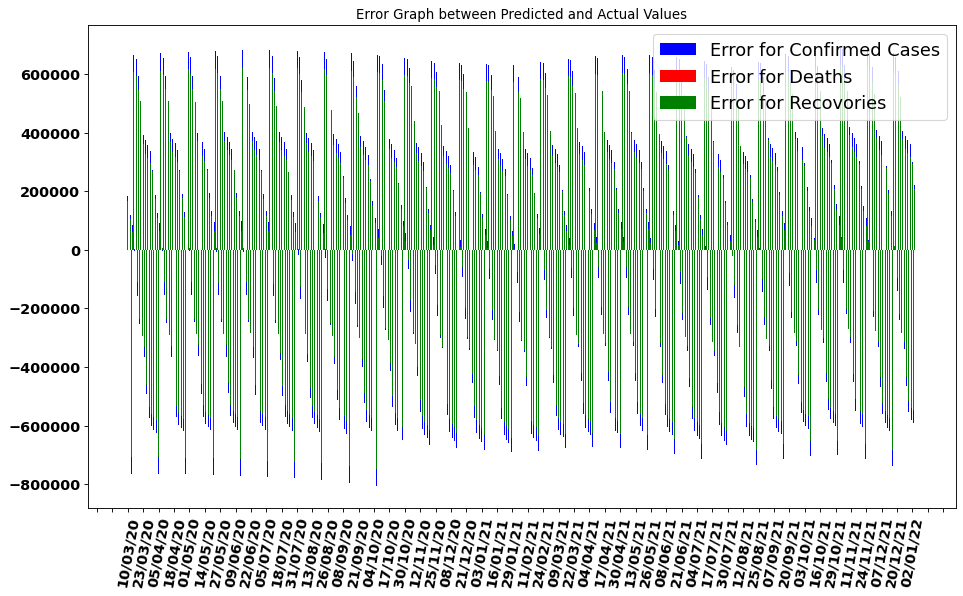

In [330]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

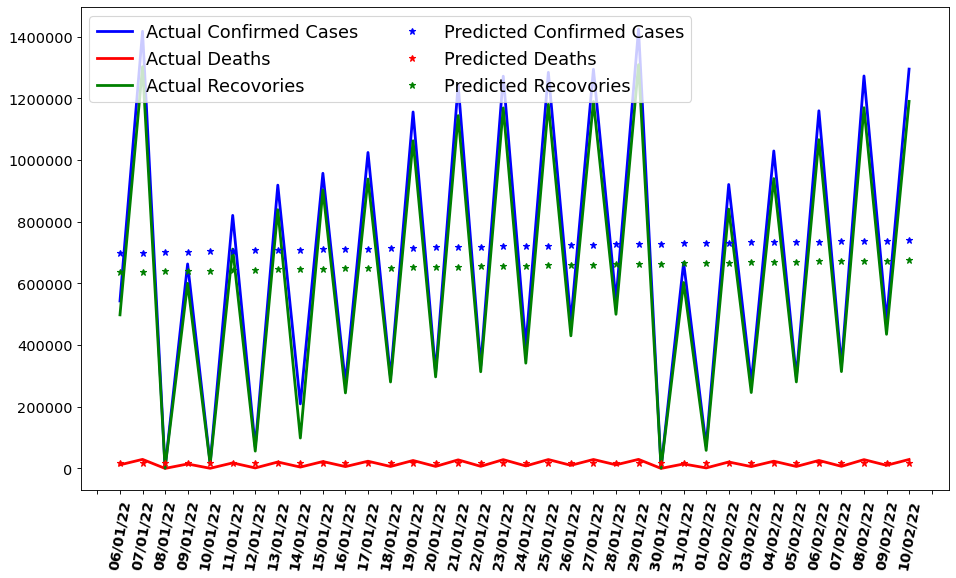

In [347]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator()) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
# y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
#                     np.max(ann_evaluation_model_prediction_on_test), 1e4)
# y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.show()

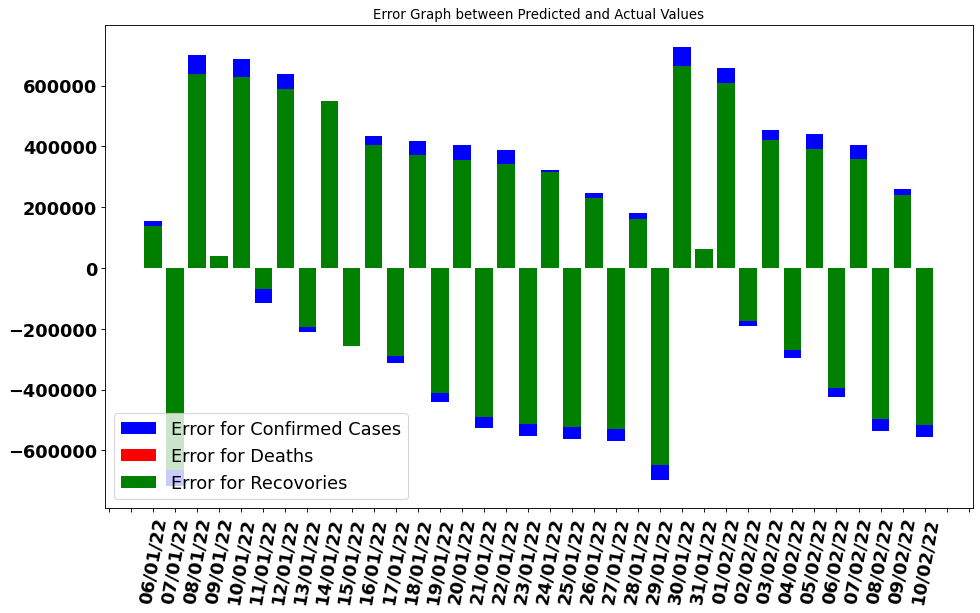

In [349]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

# 2 - Training on whole data and prediction on future data

In [350]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [351]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Epoch 1/4000
22/22 [==============================] - 0s 2ms/step - loss: 397503070208.0000 - mean_absolute_error: 429373.0312
Epoch 2/4000
22/22 [==============================] - 0s 2ms/step - loss: 392057749504.0000 - mean_absolute_error: 424387.5625
Epoch 3/4000
22/22 [==============================] - 0s 2ms/step - loss: 378339164160.0000 - mean_absolute_error: 414895.9375
Epoch 4/4000
22/22 [==============================] - 0s 2ms/step - loss: 355606462464.0000 - mean_absolute_error: 399535.9688
Epoch 5/4000
22/22 [==============================] - 0s 2ms/step - loss: 325518163968.0000 - mean_absolute_error: 379002.0938
Epoch 6/4000
22/22 [==============================] - 0s 2ms/step - loss: 291357491200.0000 - mean_absolute_error: 355898.5000
Epoch 7/4000
22/22 [==============================] - 0s 2ms/step - loss: 257453441024.0000 - mean_absolute_error: 333260.5938
Epoch 8/4000
22/22 [==============================] - 0s 2ms/step - loss: 227704029184.0000 - mean_absolute_err

22/22 [==============================] - 0s 2ms/step - loss: 127535513600.0000 - mean_absolute_error: 261499.4531
Epoch 66/4000
22/22 [==============================] - 0s 2ms/step - loss: 127471427584.0000 - mean_absolute_error: 261503.2500
Epoch 67/4000
22/22 [==============================] - 0s 2ms/step - loss: 127468199936.0000 - mean_absolute_error: 261757.3594
Epoch 68/4000
22/22 [==============================] - 0s 2ms/step - loss: 127469731840.0000 - mean_absolute_error: 261726.0469
Epoch 69/4000
22/22 [==============================] - 0s 2ms/step - loss: 127482503168.0000 - mean_absolute_error: 261607.6094
Epoch 70/4000
22/22 [==============================] - 0s 2ms/step - loss: 127482806272.0000 - mean_absolute_error: 261661.6094
Epoch 71/4000
22/22 [==============================] - 0s 2ms/step - loss: 127436128256.0000 - mean_absolute_error: 261567.1406
Epoch 72/4000
22/22 [==============================] - 0s 2ms/step - loss: 127504523264.0000 - mean_absolute_error: 26

Epoch 128/4000
22/22 [==============================] - 0s 2ms/step - loss: 127135408128.0000 - mean_absolute_error: 261613.7500
Epoch 129/4000
22/22 [==============================] - 0s 2ms/step - loss: 127113437184.0000 - mean_absolute_error: 261173.3906
Epoch 130/4000
22/22 [==============================] - 0s 2ms/step - loss: 127107506176.0000 - mean_absolute_error: 261237.8438
Epoch 131/4000
22/22 [==============================] - 0s 2ms/step - loss: 127134924800.0000 - mean_absolute_error: 261740.0781
Epoch 132/4000
22/22 [==============================] - 0s 2ms/step - loss: 127162720256.0000 - mean_absolute_error: 261554.5312
Epoch 133/4000
22/22 [==============================] - 0s 2ms/step - loss: 127137062912.0000 - mean_absolute_error: 261359.7031
Epoch 134/4000
22/22 [==============================] - 0s 2ms/step - loss: 127122341888.0000 - mean_absolute_error: 261703.8594
Epoch 135/4000
22/22 [==============================] - 0s 2ms/step - loss: 127128207360.0000 - m

Epoch 191/4000
22/22 [==============================] - 0s 2ms/step - loss: 127127764992.0000 - mean_absolute_error: 261376.2656
Epoch 192/4000
22/22 [==============================] - 0s 2ms/step - loss: 127049154560.0000 - mean_absolute_error: 261392.6094
Epoch 193/4000
22/22 [==============================] - 0s 2ms/step - loss: 126931329024.0000 - mean_absolute_error: 261575.3281
Epoch 194/4000
22/22 [==============================] - 0s 2ms/step - loss: 127020687360.0000 - mean_absolute_error: 261764.8438
Epoch 195/4000
22/22 [==============================] - 0s 2ms/step - loss: 127129935872.0000 - mean_absolute_error: 261838.6406
Epoch 196/4000
22/22 [==============================] - 0s 2ms/step - loss: 127008202752.0000 - mean_absolute_error: 261601.2344
Epoch 197/4000
22/22 [==============================] - 0s 2ms/step - loss: 126936555520.0000 - mean_absolute_error: 261354.3594
Epoch 198/4000
22/22 [==============================] - 0s 2ms/step - loss: 127076507648.0000 - m

22/22 [==============================] - 0s 2ms/step - loss: 126786256896.0000 - mean_absolute_error: 261379.0000
Epoch 318/4000
22/22 [==============================] - 0s 2ms/step - loss: 126766342144.0000 - mean_absolute_error: 261573.0938
Epoch 319/4000
22/22 [==============================] - 0s 2ms/step - loss: 126787477504.0000 - mean_absolute_error: 261410.8906
Epoch 320/4000
22/22 [==============================] - 0s 2ms/step - loss: 126786928640.0000 - mean_absolute_error: 261090.7500
Epoch 321/4000
22/22 [==============================] - 0s 2ms/step - loss: 126748606464.0000 - mean_absolute_error: 261340.2500
Epoch 322/4000
22/22 [==============================] - 0s 2ms/step - loss: 126845952000.0000 - mean_absolute_error: 261480.3594
Epoch 323/4000
22/22 [==============================] - 0s 2ms/step - loss: 126732763136.0000 - mean_absolute_error: 261396.5938
Epoch 324/4000
22/22 [==============================] - 0s 2ms/step - loss: 126859960320.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 126664499200.0000 - mean_absolute_error: 261411.5781
Epoch 444/4000
22/22 [==============================] - 0s 2ms/step - loss: 126622515200.0000 - mean_absolute_error: 261075.2969
Epoch 445/4000
22/22 [==============================] - 0s 2ms/step - loss: 126574239744.0000 - mean_absolute_error: 261176.9688
Epoch 446/4000
22/22 [==============================] - ETA: 0s - loss: 123789950976.0000 - mean_absolute_error: 246619.031 - 0s 2ms/step - loss: 126623744000.0000 - mean_absolute_error: 261289.9531
Epoch 447/4000
22/22 [==============================] - 0s 2ms/step - loss: 126632681472.0000 - mean_absolute_error: 261141.4219
Epoch 448/4000
22/22 [==============================] - 0s 2ms/step - loss: 126590763008.0000 - mean_absolute_error: 261343.4062
Epoch 449/4000
22/22 [==============================] - 0s 2ms/step - loss: 126703550464.0000 - mean_absolute_error: 261649.8281
Epoch 450/4000
22/22 [====================

22/22 [==============================] - 0s 2ms/step - loss: 126710988800.0000 - mean_absolute_error: 261611.8750
Epoch 506/4000
22/22 [==============================] - 0s 2ms/step - loss: 126614560768.0000 - mean_absolute_error: 261212.2656
Epoch 507/4000
22/22 [==============================] - 0s 2ms/step - loss: 126585298944.0000 - mean_absolute_error: 261122.9062
Epoch 508/4000
22/22 [==============================] - 0s 2ms/step - loss: 126591410176.0000 - mean_absolute_error: 261420.8594
Epoch 509/4000
22/22 [==============================] - 0s 2ms/step - loss: 126594859008.0000 - mean_absolute_error: 261296.1875
Epoch 510/4000
22/22 [==============================] - 0s 2ms/step - loss: 126656790528.0000 - mean_absolute_error: 261384.7656
Epoch 511/4000
22/22 [==============================] - 0s 2ms/step - loss: 126707630080.0000 - mean_absolute_error: 261624.1406
Epoch 512/4000
22/22 [==============================] - 0s 2ms/step - loss: 126648664064.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 126498193408.0000 - mean_absolute_error: 261171.9844
Epoch 632/4000
22/22 [==============================] - 0s 1ms/step - loss: 126576902144.0000 - mean_absolute_error: 261305.0156
Epoch 633/4000
22/22 [==============================] - 0s 2ms/step - loss: 126622146560.0000 - mean_absolute_error: 261220.5000
Epoch 634/4000
22/22 [==============================] - 0s 2ms/step - loss: 126642339840.0000 - mean_absolute_error: 261521.3125
Epoch 635/4000
22/22 [==============================] - 0s 2ms/step - loss: 126614593536.0000 - mean_absolute_error: 261742.7031
Epoch 636/4000
22/22 [==============================] - 0s 2ms/step - loss: 126460821504.0000 - mean_absolute_error: 261267.3438
Epoch 637/4000
22/22 [==============================] - 0s 2ms/step - loss: 126520598528.0000 - mean_absolute_error: 261063.8594
Epoch 638/4000
22/22 [==============================] - 0s 2ms/step - loss: 126565048320.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 126400331776.0000 - mean_absolute_error: 261134.6562
Epoch 758/4000
22/22 [==============================] - 0s 2ms/step - loss: 126504386560.0000 - mean_absolute_error: 261558.8281
Epoch 759/4000
22/22 [==============================] - 0s 2ms/step - loss: 126724636672.0000 - mean_absolute_error: 261804.1719
Epoch 760/4000
22/22 [==============================] - 0s 2ms/step - loss: 126565957632.0000 - mean_absolute_error: 261252.0938
Epoch 761/4000
22/22 [==============================] - 0s 2ms/step - loss: 126458388480.0000 - mean_absolute_error: 261221.3750
Epoch 762/4000
22/22 [==============================] - 0s 2ms/step - loss: 126502633472.0000 - mean_absolute_error: 261445.4844
Epoch 763/4000
22/22 [==============================] - 0s 2ms/step - loss: 126516330496.0000 - mean_absolute_error: 261350.1406
Epoch 764/4000
22/22 [==============================] - 0s 2ms/step - loss: 126514036736.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 126457585664.0000 - mean_absolute_error: 261548.0156
Epoch 884/4000
22/22 [==============================] - 0s 2ms/step - loss: 126404739072.0000 - mean_absolute_error: 261098.5781
Epoch 885/4000
22/22 [==============================] - 0s 2ms/step - loss: 126411825152.0000 - mean_absolute_error: 261097.7344
Epoch 886/4000
22/22 [==============================] - 0s 2ms/step - loss: 126376763392.0000 - mean_absolute_error: 261255.6875
Epoch 887/4000
22/22 [==============================] - 0s 2ms/step - loss: 126441750528.0000 - mean_absolute_error: 261265.3906
Epoch 888/4000
22/22 [==============================] - 0s 2ms/step - loss: 126461091840.0000 - mean_absolute_error: 261275.8594
Epoch 889/4000
22/22 [==============================] - 0s 2ms/step - loss: 126439890944.0000 - mean_absolute_error: 261343.7500
Epoch 890/4000
22/22 [==============================] - 0s 2ms/step - loss: 126540423168.0000 - mean_absolute_er

22/22 [==============================] - 0s 2ms/step - loss: 126365179904.0000 - mean_absolute_error: 261009.4531
Epoch 1009/4000
22/22 [==============================] - 0s 2ms/step - loss: 126507114496.0000 - mean_absolute_error: 261160.0156
Epoch 1010/4000
22/22 [==============================] - 0s 2ms/step - loss: 126386405376.0000 - mean_absolute_error: 261374.9531
Epoch 1011/4000
22/22 [==============================] - 0s 2ms/step - loss: 126448803840.0000 - mean_absolute_error: 261561.2656
Epoch 1012/4000
22/22 [==============================] - 0s 2ms/step - loss: 126365032448.0000 - mean_absolute_error: 261306.9688
Epoch 1013/4000
22/22 [==============================] - 0s 2ms/step - loss: 126339981312.0000 - mean_absolute_error: 261075.1875
Epoch 1014/4000
22/22 [==============================] - 0s 2ms/step - loss: 126470619136.0000 - mean_absolute_error: 261211.0312
Epoch 1015/4000
22/22 [==============================] - 0s 2ms/step - loss: 126446223360.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126494973952.0000 - mean_absolute_error: 261125.7188
Epoch 1132/4000
22/22 [==============================] - 0s 2ms/step - loss: 126422130688.0000 - mean_absolute_error: 261385.1094
Epoch 1133/4000
22/22 [==============================] - 0s 2ms/step - loss: 126499708928.0000 - mean_absolute_error: 261629.7500
Epoch 1134/4000
22/22 [==============================] - 0s 2ms/step - loss: 126291886080.0000 - mean_absolute_error: 261100.6250
Epoch 1135/4000
22/22 [==============================] - 0s 2ms/step - loss: 126451466240.0000 - mean_absolute_error: 260968.3594
Epoch 1136/4000
22/22 [==============================] - 0s 3ms/step - loss: 126409039872.0000 - mean_absolute_error: 261112.3594
Epoch 1137/4000
22/22 [==============================] - 0s 2ms/step - loss: 126608154624.0000 - mean_absolute_error: 261734.5938
Epoch 1138/4000
22/22 [==============================] - 0s 2ms/step - loss: 126446919680.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126398038016.0000 - mean_absolute_error: 261201.4062
Epoch 1257/4000
22/22 [==============================] - 0s 2ms/step - loss: 126435483648.0000 - mean_absolute_error: 261469.1250
Epoch 1258/4000
22/22 [==============================] - 0s 2ms/step - loss: 126367588352.0000 - mean_absolute_error: 261084.1719
Epoch 1259/4000
22/22 [==============================] - 0s 2ms/step - loss: 126412734464.0000 - mean_absolute_error: 260919.1875
Epoch 1260/4000
22/22 [==============================] - 0s 2ms/step - loss: 126342864896.0000 - mean_absolute_error: 261117.1250
Epoch 1261/4000
22/22 [==============================] - 0s 2ms/step - loss: 126347403264.0000 - mean_absolute_error: 261348.3281
Epoch 1262/4000
22/22 [==============================] - 0s 2ms/step - loss: 126377639936.0000 - mean_absolute_error: 261455.2500
Epoch 1263/4000
22/22 [==============================] - 0s 2ms/step - loss: 126370201600.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126424866816.0000 - mean_absolute_error: 261610.7812
Epoch 1382/4000
22/22 [==============================] - 0s 2ms/step - loss: 126346780672.0000 - mean_absolute_error: 261019.7188
Epoch 1383/4000
22/22 [==============================] - 0s 2ms/step - loss: 126437564416.0000 - mean_absolute_error: 261269.3750
Epoch 1384/4000
22/22 [==============================] - 0s 2ms/step - loss: 126460780544.0000 - mean_absolute_error: 261148.3125
Epoch 1385/4000
22/22 [==============================] - 0s 2ms/step - loss: 126330118144.0000 - mean_absolute_error: 261198.0000
Epoch 1386/4000
22/22 [==============================] - 0s 2ms/step - loss: 126530781184.0000 - mean_absolute_error: 261160.2812
Epoch 1387/4000
22/22 [==============================] - 0s 2ms/step - loss: 126376443904.0000 - mean_absolute_error: 260934.0938
Epoch 1388/4000
22/22 [==============================] - 0s 2ms/step - loss: 126345183232.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126338768896.0000 - mean_absolute_error: 261376.2969
Epoch 1507/4000
22/22 [==============================] - 0s 2ms/step - loss: 126300012544.0000 - mean_absolute_error: 261524.1719
Epoch 1508/4000
22/22 [==============================] - 0s 2ms/step - loss: 126336851968.0000 - mean_absolute_error: 261418.1562
Epoch 1509/4000
22/22 [==============================] - 0s 2ms/step - loss: 126443962368.0000 - mean_absolute_error: 261581.8906
Epoch 1510/4000
22/22 [==============================] - 0s 2ms/step - loss: 126286913536.0000 - mean_absolute_error: 260893.1719
Epoch 1511/4000
22/22 [==============================] - 0s 2ms/step - loss: 126365278208.0000 - mean_absolute_error: 261284.9688
Epoch 1512/4000
22/22 [==============================] - 0s 2ms/step - loss: 126440398848.0000 - mean_absolute_error: 261583.1875
Epoch 1513/4000
22/22 [==============================] - 0s 2ms/step - loss: 126352744448.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126262484992.0000 - mean_absolute_error: 261115.7188
Epoch 1632/4000
22/22 [==============================] - 0s 2ms/step - loss: 126340194304.0000 - mean_absolute_error: 261520.8438
Epoch 1633/4000
22/22 [==============================] - 0s 2ms/step - loss: 126316503040.0000 - mean_absolute_error: 261553.5938
Epoch 1634/4000
22/22 [==============================] - 0s 2ms/step - loss: 126336860160.0000 - mean_absolute_error: 260962.3594
Epoch 1635/4000
22/22 [==============================] - 0s 3ms/step - loss: 126348664832.0000 - mean_absolute_error: 261093.0000
Epoch 1636/4000
22/22 [==============================] - 0s 2ms/step - loss: 126313168896.0000 - mean_absolute_error: 261324.4531
Epoch 1637/4000
22/22 [==============================] - 0s 2ms/step - loss: 126317068288.0000 - mean_absolute_error: 261023.7969
Epoch 1638/4000
22/22 [==============================] - ETA: 0s - loss: 100145758208.0000 - mean_absolute

22/22 [==============================] - 0s 3ms/step - loss: 126284029952.0000 - mean_absolute_error: 260962.4531
Epoch 1757/4000
22/22 [==============================] - 0s 3ms/step - loss: 126257545216.0000 - mean_absolute_error: 260985.2344
Epoch 1758/4000
22/22 [==============================] - 0s 2ms/step - loss: 126246273024.0000 - mean_absolute_error: 261035.7188
Epoch 1759/4000
22/22 [==============================] - 0s 2ms/step - loss: 126349631488.0000 - mean_absolute_error: 261280.0469
Epoch 1760/4000
22/22 [==============================] - 0s 2ms/step - loss: 126353899520.0000 - mean_absolute_error: 261175.1719
Epoch 1761/4000
22/22 [==============================] - 0s 2ms/step - loss: 126353924096.0000 - mean_absolute_error: 261381.4219
Epoch 1762/4000
22/22 [==============================] - 0s 2ms/step - loss: 126261231616.0000 - mean_absolute_error: 261372.0469
Epoch 1763/4000
22/22 [==============================] - 0s 2ms/step - loss: 126241677312.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126506762240.0000 - mean_absolute_error: 261360.4375
Epoch 1883/4000
22/22 [==============================] - 0s 2ms/step - loss: 126257643520.0000 - mean_absolute_error: 261255.5781
Epoch 1884/4000
22/22 [==============================] - 0s 2ms/step - loss: 126266867712.0000 - mean_absolute_error: 261284.1719
Epoch 1885/4000
22/22 [==============================] - 0s 2ms/step - loss: 126294622208.0000 - mean_absolute_error: 261283.6719
Epoch 1886/4000
22/22 [==============================] - 0s 2ms/step - loss: 126277500928.0000 - mean_absolute_error: 261052.0000
Epoch 1887/4000
22/22 [==============================] - 0s 3ms/step - loss: 126284636160.0000 - mean_absolute_error: 261241.7344
Epoch 1888/4000
22/22 [==============================] - 0s 3ms/step - loss: 126509432832.0000 - mean_absolute_error: 261446.9688A: 0s - loss: 125803298816.0000 - mean_absolute_error: 260832.218
Epoch 1889/4000
22/22 [==================

22/22 [==============================] - 0s 2ms/step - loss: 126470569984.0000 - mean_absolute_error: 261106.6250
Epoch 2007/4000
22/22 [==============================] - 0s 2ms/step - loss: 126238171136.0000 - mean_absolute_error: 261142.3281
Epoch 2008/4000
22/22 [==============================] - 0s 2ms/step - loss: 126234386432.0000 - mean_absolute_error: 261273.3750
Epoch 2009/4000
22/22 [==============================] - 0s 2ms/step - loss: 126298595328.0000 - mean_absolute_error: 261429.6406
Epoch 2010/4000
22/22 [==============================] - 0s 2ms/step - loss: 126259429376.0000 - mean_absolute_error: 261014.5312
Epoch 2011/4000
22/22 [==============================] - 0s 2ms/step - loss: 126469316608.0000 - mean_absolute_error: 261510.0156
Epoch 2012/4000
22/22 [==============================] - 0s 2ms/step - loss: 126384316416.0000 - mean_absolute_error: 261456.3438
Epoch 2013/4000
22/22 [==============================] - 0s 2ms/step - loss: 126232633344.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126276050944.0000 - mean_absolute_error: 261189.4688
Epoch 2129/4000
22/22 [==============================] - 0s 1ms/step - loss: 126252343296.0000 - mean_absolute_error: 261017.1250
Epoch 2130/4000
22/22 [==============================] - 0s 2ms/step - loss: 126282596352.0000 - mean_absolute_error: 261353.4688
Epoch 2131/4000
22/22 [==============================] - 0s 2ms/step - loss: 126330716160.0000 - mean_absolute_error: 261103.6094
Epoch 2132/4000
22/22 [==============================] - 0s 1ms/step - loss: 126349213696.0000 - mean_absolute_error: 261360.6094
Epoch 2133/4000
22/22 [==============================] - 0s 999us/step - loss: 126281064448.0000 - mean_absolute_error: 261359.4062
Epoch 2134/4000
22/22 [==============================] - 0s 2ms/step - loss: 126278950912.0000 - mean_absolute_error: 261101.1719
Epoch 2135/4000
22/22 [==============================] - 0s 2ms/step - loss: 126232903680.0000 - mean_ab

22/22 [==============================] - 0s 3ms/step - loss: 126302748672.0000 - mean_absolute_error: 261117.8438
Epoch 2253/4000
22/22 [==============================] - 0s 2ms/step - loss: 126301659136.0000 - mean_absolute_error: 261382.5938
Epoch 2254/4000
22/22 [==============================] - 0s 2ms/step - loss: 126300389376.0000 - mean_absolute_error: 261245.1719
Epoch 2255/4000
22/22 [==============================] - 0s 1ms/step - loss: 126354579456.0000 - mean_absolute_error: 260923.7188
Epoch 2256/4000
22/22 [==============================] - 0s 2ms/step - loss: 126278787072.0000 - mean_absolute_error: 261294.7188
Epoch 2257/4000
22/22 [==============================] - 0s 2ms/step - loss: 126394286080.0000 - mean_absolute_error: 261764.0000
Epoch 2258/4000
22/22 [==============================] - 0s 1ms/step - loss: 126335229952.0000 - mean_absolute_error: 261305.0781
Epoch 2259/4000
22/22 [==============================] - 0s 2ms/step - loss: 126283849728.0000 - mean_abso

22/22 [==============================] - 0s 1ms/step - loss: 126226202624.0000 - mean_absolute_error: 261356.2031
Epoch 2316/4000
22/22 [==============================] - 0s 2ms/step - loss: 126264860672.0000 - mean_absolute_error: 261330.4375
Epoch 2317/4000
22/22 [==============================] - 0s 2ms/step - loss: 126213709824.0000 - mean_absolute_error: 261030.2969
Epoch 2318/4000
22/22 [==============================] - 0s 2ms/step - loss: 126355120128.0000 - mean_absolute_error: 261284.9375
Epoch 2319/4000
22/22 [==============================] - 0s 2ms/step - loss: 126234468352.0000 - mean_absolute_error: 261155.5000
Epoch 2320/4000
22/22 [==============================] - 0s 2ms/step - loss: 126401822720.0000 - mean_absolute_error: 261511.3438
Epoch 2321/4000
22/22 [==============================] - 0s 2ms/step - loss: 126196203520.0000 - mean_absolute_error: 261210.5312
Epoch 2322/4000
22/22 [==============================] - 0s 969us/step - loss: 126250819584.0000 - mean_ab

22/22 [==============================] - 0s 2ms/step - loss: 126222811136.0000 - mean_absolute_error: 261288.8594
Epoch 2379/4000
22/22 [==============================] - 0s 2ms/step - loss: 126241890304.0000 - mean_absolute_error: 261056.6562
Epoch 2380/4000
22/22 [==============================] - 0s 2ms/step - loss: 126251163648.0000 - mean_absolute_error: 261196.4219
Epoch 2381/4000
22/22 [==============================] - 0s 2ms/step - loss: 126445019136.0000 - mean_absolute_error: 261002.9688
Epoch 2382/4000
22/22 [==============================] - 0s 2ms/step - loss: 126253776896.0000 - mean_absolute_error: 261089.8438
Epoch 2383/4000
22/22 [==============================] - 0s 2ms/step - loss: 126305492992.0000 - mean_absolute_error: 261352.0781
Epoch 2384/4000
22/22 [==============================] - 0s 2ms/step - loss: 126298390528.0000 - mean_absolute_error: 261642.7188
Epoch 2385/4000
22/22 [==============================] - 0s 2ms/step - loss: 126364033024.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126402027520.0000 - mean_absolute_error: 261362.3594
Epoch 2503/4000
22/22 [==============================] - 0s 2ms/step - loss: 126343757824.0000 - mean_absolute_error: 261396.7969
Epoch 2504/4000
22/22 [==============================] - 0s 2ms/step - loss: 126259372032.0000 - mean_absolute_error: 261088.5469
Epoch 2505/4000
22/22 [==============================] - 0s 2ms/step - loss: 126217707520.0000 - mean_absolute_error: 260932.1875
Epoch 2506/4000
22/22 [==============================] - 0s 2ms/step - loss: 126245658624.0000 - mean_absolute_error: 261016.1094
Epoch 2507/4000
22/22 [==============================] - 0s 2ms/step - loss: 126328127488.0000 - mean_absolute_error: 261390.8906
Epoch 2508/4000
22/22 [==============================] - 0s 2ms/step - loss: 126256250880.0000 - mean_absolute_error: 261305.0312
Epoch 2509/4000
22/22 [==============================] - 0s 2ms/step - loss: 126295400448.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126254088192.0000 - mean_absolute_error: 261170.2969
Epoch 2627/4000
22/22 [==============================] - 0s 2ms/step - loss: 126258528256.0000 - mean_absolute_error: 261041.3594
Epoch 2628/4000
22/22 [==============================] - 0s 2ms/step - loss: 126224056320.0000 - mean_absolute_error: 261295.9531
Epoch 2629/4000
22/22 [==============================] - 0s 3ms/step - loss: 126220034048.0000 - mean_absolute_error: 261216.0469
Epoch 2630/4000
22/22 [==============================] - 0s 4ms/step - loss: 126250622976.0000 - mean_absolute_error: 261087.4375
Epoch 2631/4000
22/22 [==============================] - 0s 2ms/step - loss: 126248345600.0000 - mean_absolute_error: 261256.3125
Epoch 2632/4000
22/22 [==============================] - 0s 2ms/step - loss: 126347673600.0000 - mean_absolute_error: 261002.1719
Epoch 2633/4000
22/22 [==============================] - 0s 2ms/step - loss: 126439849984.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126256226304.0000 - mean_absolute_error: 261019.4688
Epoch 2751/4000
22/22 [==============================] - 0s 2ms/step - loss: 126220877824.0000 - mean_absolute_error: 261163.6094
Epoch 2752/4000
22/22 [==============================] - 0s 2ms/step - loss: 126454841344.0000 - mean_absolute_error: 261222.1875
Epoch 2753/4000
22/22 [==============================] - 0s 2ms/step - loss: 126311555072.0000 - mean_absolute_error: 261258.2812
Epoch 2754/4000
22/22 [==============================] - 0s 2ms/step - loss: 126206402560.0000 - mean_absolute_error: 261295.7656
Epoch 2755/4000
22/22 [==============================] - 0s 2ms/step - loss: 126329331712.0000 - mean_absolute_error: 261031.5156
Epoch 2756/4000
22/22 [==============================] - 0s 1ms/step - loss: 126252228608.0000 - mean_absolute_error: 260973.6094
Epoch 2757/4000
22/22 [==============================] - 0s 1ms/step - loss: 126247002112.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126418231296.0000 - mean_absolute_error: 261619.6250
Epoch 2876/4000
22/22 [==============================] - 0s 2ms/step - loss: 126259544064.0000 - mean_absolute_error: 261257.8594
Epoch 2877/4000
22/22 [==============================] - 0s 2ms/step - loss: 126202478592.0000 - mean_absolute_error: 260775.6250
Epoch 2878/4000
22/22 [==============================] - 0s 2ms/step - loss: 126204485632.0000 - mean_absolute_error: 261151.2188
Epoch 2879/4000
22/22 [==============================] - 0s 2ms/step - loss: 126201896960.0000 - mean_absolute_error: 261135.5469
Epoch 2880/4000
22/22 [==============================] - 0s 2ms/step - loss: 126376648704.0000 - mean_absolute_error: 261584.0625
Epoch 2881/4000
22/22 [==============================] - 0s 2ms/step - loss: 126354579456.0000 - mean_absolute_error: 261192.4688
Epoch 2882/4000
22/22 [==============================] - 0s 2ms/step - loss: 126349238272.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126274371584.0000 - mean_absolute_error: 261075.5781
Epoch 2939/4000
22/22 [==============================] - 0s 1ms/step - loss: 126267604992.0000 - mean_absolute_error: 261207.0781
Epoch 2940/4000
22/22 [==============================] - 0s 981us/step - loss: 126199652352.0000 - mean_absolute_error: 261057.7812
Epoch 2941/4000
22/22 [==============================] - 0s 1ms/step - loss: 126284406784.0000 - mean_absolute_error: 260996.2812
Epoch 2942/4000
22/22 [==============================] - 0s 2ms/step - loss: 126226939904.0000 - mean_absolute_error: 261278.1406
Epoch 2943/4000
22/22 [==============================] - 0s 2ms/step - loss: 126323736576.0000 - mean_absolute_error: 261458.3594
Epoch 2944/4000
22/22 [==============================] - 0s 1ms/step - loss: 126495006720.0000 - mean_absolute_error: 261381.0938
Epoch 2945/4000
22/22 [==============================] - 0s 2ms/step - loss: 126187249664.0000 - mean_ab

22/22 [==============================] - 0s 2ms/step - loss: 126237417472.0000 - mean_absolute_error: 261133.0938
Epoch 3002/4000
22/22 [==============================] - 0s 2ms/step - loss: 126201151488.0000 - mean_absolute_error: 261100.2969
Epoch 3003/4000
22/22 [==============================] - 0s 2ms/step - loss: 126253776896.0000 - mean_absolute_error: 261324.0625
Epoch 3004/4000
22/22 [==============================] - 0s 2ms/step - loss: 126226866176.0000 - mean_absolute_error: 261271.8750
Epoch 3005/4000
22/22 [==============================] - 0s 1ms/step - loss: 126412554240.0000 - mean_absolute_error: 261449.1562
Epoch 3006/4000
22/22 [==============================] - 0s 988us/step - loss: 126271578112.0000 - mean_absolute_error: 260803.7031
Epoch 3007/4000
22/22 [==============================] - 0s 2ms/step - loss: 126277058560.0000 - mean_absolute_error: 261204.9844
Epoch 3008/4000
22/22 [==============================] - 0s 940us/step - loss: 126220353536.0000 - mean_

22/22 [==============================] - 0s 1ms/step - loss: 126659387392.0000 - mean_absolute_error: 261523.7969
Epoch 3065/4000
22/22 [==============================] - 0s 974us/step - loss: 126245986304.0000 - mean_absolute_error: 261527.4688
Epoch 3066/4000
22/22 [==============================] - 0s 2ms/step - loss: 126156742656.0000 - mean_absolute_error: 261358.5469
Epoch 3067/4000
22/22 [==============================] - 0s 2ms/step - loss: 126169112576.0000 - mean_absolute_error: 261132.0156
Epoch 3068/4000
22/22 [==============================] - 0s 2ms/step - loss: 126189600768.0000 - mean_absolute_error: 261097.5312
Epoch 3069/4000
22/22 [==============================] - 0s 2ms/step - loss: 126236114944.0000 - mean_absolute_error: 261048.9375
Epoch 3070/4000
22/22 [==============================] - 0s 1ms/step - loss: 126160461824.0000 - mean_absolute_error: 260888.8125
Epoch 3071/4000
22/22 [==============================] - 0s 1ms/step - loss: 126365835264.0000 - mean_ab

22/22 [==============================] - 0s 2ms/step - loss: 126208262144.0000 - mean_absolute_error: 261331.5469
Epoch 3128/4000
22/22 [==============================] - 0s 2ms/step - loss: 126200651776.0000 - mean_absolute_error: 261019.7031
Epoch 3129/4000
22/22 [==============================] - 0s 2ms/step - loss: 126159446016.0000 - mean_absolute_error: 261074.5938
Epoch 3130/4000
22/22 [==============================] - 0s 970us/step - loss: 126262853632.0000 - mean_absolute_error: 261153.8906
Epoch 3131/4000
22/22 [==============================] - 0s 1ms/step - loss: 126224121856.0000 - mean_absolute_error: 261330.0312
Epoch 3132/4000
22/22 [==============================] - 0s 2ms/step - loss: 126217527296.0000 - mean_absolute_error: 261263.7344
Epoch 3133/4000
22/22 [==============================] - 0s 941us/step - loss: 126239318016.0000 - mean_absolute_error: 261385.9688
Epoch 3134/4000
22/22 [==============================] - 0s 1ms/step - loss: 126310957056.0000 - mean_

22/22 [==============================] - 0s 2ms/step - loss: 126216380416.0000 - mean_absolute_error: 260934.7344
Epoch 3191/4000
22/22 [==============================] - 0s 1ms/step - loss: 126320082944.0000 - mean_absolute_error: 261379.4531
Epoch 3192/4000
22/22 [==============================] - 0s 2ms/step - loss: 126153056256.0000 - mean_absolute_error: 261183.9375
Epoch 3193/4000
22/22 [==============================] - 0s 1ms/step - loss: 126190690304.0000 - mean_absolute_error: 261206.7344
Epoch 3194/4000
22/22 [==============================] - 0s 2ms/step - loss: 126201634816.0000 - mean_absolute_error: 260941.6719
Epoch 3195/4000
22/22 [==============================] - 0s 1ms/step - loss: 126293934080.0000 - mean_absolute_error: 261408.6406
Epoch 3196/4000
22/22 [==============================] - 0s 2ms/step - loss: 126215757824.0000 - mean_absolute_error: 261150.7969
Epoch 3197/4000
22/22 [==============================] - 0s 1ms/step - loss: 126297186304.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126277656576.0000 - mean_absolute_error: 261505.0469
Epoch 3317/4000
22/22 [==============================] - 0s 2ms/step - loss: 126204968960.0000 - mean_absolute_error: 261192.1406
Epoch 3318/4000
22/22 [==============================] - 0s 2ms/step - loss: 126216806400.0000 - mean_absolute_error: 260777.8594
Epoch 3319/4000
22/22 [==============================] - 0s 2ms/step - loss: 126230994944.0000 - mean_absolute_error: 261254.4688
Epoch 3320/4000
22/22 [==============================] - ETA: 0s - loss: 112311255040.0000 - mean_absolute_error: 242360.375 - 0s 1ms/step - loss: 126162837504.0000 - mean_absolute_error: 261242.7656
Epoch 3321/4000
22/22 [==============================] - 0s 2ms/step - loss: 126241284096.0000 - mean_absolute_error: 261325.3750
Epoch 3322/4000
22/22 [==============================] - 0s 1ms/step - loss: 126211416064.0000 - mean_absolute_error: 260901.0938
Epoch 3323/4000
22/22 [=============

Epoch 3378/4000
22/22 [==============================] - 0s 2ms/step - loss: 126282784768.0000 - mean_absolute_error: 261120.2500
Epoch 3379/4000
22/22 [==============================] - 0s 2ms/step - loss: 126194229248.0000 - mean_absolute_error: 260970.7812
Epoch 3380/4000
22/22 [==============================] - 0s 2ms/step - loss: 126183555072.0000 - mean_absolute_error: 261186.7344
Epoch 3381/4000
22/22 [==============================] - 0s 2ms/step - loss: 126270758912.0000 - mean_absolute_error: 261165.9219
Epoch 3382/4000
22/22 [==============================] - 0s 2ms/step - loss: 126184521728.0000 - mean_absolute_error: 261003.7188
Epoch 3383/4000
22/22 [==============================] - 0s 2ms/step - loss: 126329823232.0000 - mean_absolute_error: 261484.3281
Epoch 3384/4000
22/22 [==============================] - 0s 996us/step - loss: 126188634112.0000 - mean_absolute_error: 261041.5000
Epoch 3385/4000
22/22 [==============================] - 0s 2ms/step - loss: 12632421171

22/22 [==============================] - 0s 1ms/step - loss: 126270636032.0000 - mean_absolute_error: 261335.8906
Epoch 3504/4000
22/22 [==============================] - 0s 2ms/step - loss: 126321516544.0000 - mean_absolute_error: 261462.3438
Epoch 3505/4000
22/22 [==============================] - 0s 1ms/step - loss: 126306140160.0000 - mean_absolute_error: 261456.1562
Epoch 3506/4000
22/22 [==============================] - 0s 2ms/step - loss: 126175346688.0000 - mean_absolute_error: 261019.0781
Epoch 3507/4000
22/22 [==============================] - 0s 1ms/step - loss: 126177861632.0000 - mean_absolute_error: 260879.8594
Epoch 3508/4000
22/22 [==============================] - 0s 2ms/step - loss: 126296809472.0000 - mean_absolute_error: 261304.9375
Epoch 3509/4000
22/22 [==============================] - 0s 2ms/step - loss: 126272299008.0000 - mean_absolute_error: 261142.6875
Epoch 3510/4000
22/22 [==============================] - 0s 2ms/step - loss: 126292664320.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126209212416.0000 - mean_absolute_error: 261003.9688
Epoch 3567/4000
22/22 [==============================] - 0s 2ms/step - loss: 126195941376.0000 - mean_absolute_error: 260816.1094
Epoch 3568/4000
22/22 [==============================] - 0s 3ms/step - loss: 126404780032.0000 - mean_absolute_error: 261398.2344
Epoch 3569/4000
22/22 [==============================] - 0s 3ms/step - loss: 126335361024.0000 - mean_absolute_error: 261224.9688
Epoch 3570/4000
22/22 [==============================] - ETA: 0s - loss: 116289011712.0000 - mean_absolute_error: 242206.546 - 0s 2ms/step - loss: 126202617856.0000 - mean_absolute_error: 260991.1562
Epoch 3571/4000
22/22 [==============================] - 0s 2ms/step - loss: 126385307648.0000 - mean_absolute_error: 261253.7812
Epoch 3572/4000
22/22 [==============================] - 0s 2ms/step - loss: 126127087616.0000 - mean_absolute_error: 261137.9844
Epoch 3573/4000
22/22 [=============

22/22 [==============================] - 0s 3ms/step - loss: 126177648640.0000 - mean_absolute_error: 261086.9531
Epoch 3692/4000
22/22 [==============================] - 0s 2ms/step - loss: 126213218304.0000 - mean_absolute_error: 261127.4844
Epoch 3693/4000
22/22 [==============================] - 0s 1ms/step - loss: 126246100992.0000 - mean_absolute_error: 261195.2500
Epoch 3694/4000
22/22 [==============================] - 0s 1ms/step - loss: 126329561088.0000 - mean_absolute_error: 261119.7969
Epoch 3695/4000
22/22 [==============================] - 0s 2ms/step - loss: 126368030720.0000 - mean_absolute_error: 261203.6875
Epoch 3696/4000
22/22 [==============================] - 0s 1ms/step - loss: 126233395200.0000 - mean_absolute_error: 261419.1562
Epoch 3697/4000
22/22 [==============================] - 0s 1ms/step - loss: 126179041280.0000 - mean_absolute_error: 261143.6719
Epoch 3698/4000
22/22 [==============================] - 0s 2ms/step - loss: 126236811264.0000 - mean_abso

22/22 [==============================] - 0s 2ms/step - loss: 126215208960.0000 - mean_absolute_error: 260987.2188
Epoch 3817/4000
22/22 [==============================] - 0s 2ms/step - loss: 126178287616.0000 - mean_absolute_error: 261218.8750
Epoch 3818/4000
22/22 [==============================] - 0s 987us/step - loss: 126139908096.0000 - mean_absolute_error: 261046.1875
Epoch 3819/4000
22/22 [==============================] - 0s 1ms/step - loss: 126246666240.0000 - mean_absolute_error: 261255.0312
Epoch 3820/4000
22/22 [==============================] - 0s 1ms/step - loss: 126323810304.0000 - mean_absolute_error: 261006.3906
Epoch 3821/4000
22/22 [==============================] - 0s 991us/step - loss: 126443413504.0000 - mean_absolute_error: 261609.7812
Epoch 3822/4000
22/22 [==============================] - 0s 2ms/step - loss: 126234640384.0000 - mean_absolute_error: 261145.0625
Epoch 3823/4000
22/22 [==============================] - 0s 2ms/step - loss: 126220410880.0000 - mean_

22/22 [==============================] - 0s 2ms/step - loss: 126239817728.0000 - mean_absolute_error: 261295.2188
Epoch 3941/4000
22/22 [==============================] - 0s 2ms/step - loss: 126141112320.0000 - mean_absolute_error: 261067.6250
Epoch 3942/4000
22/22 [==============================] - 0s 2ms/step - loss: 126169571328.0000 - mean_absolute_error: 261158.4375
Epoch 3943/4000
22/22 [==============================] - 0s 971us/step - loss: 126197301248.0000 - mean_absolute_error: 261221.7344
Epoch 3944/4000
22/22 [==============================] - 0s 2ms/step - loss: 126217789440.0000 - mean_absolute_error: 261008.7344
Epoch 3945/4000
22/22 [==============================] - 0s 2ms/step - loss: 126189903872.0000 - mean_absolute_error: 261126.7344
Epoch 3946/4000
22/22 [==============================] - 0s 2ms/step - loss: 126211702784.0000 - mean_absolute_error: 260981.8750
Epoch 3947/4000
22/22 [==============================] - 0s 2ms/step - loss: 126287118336.0000 - mean_ab

#### Covergence rate is plotted for neural network loss function during optimization

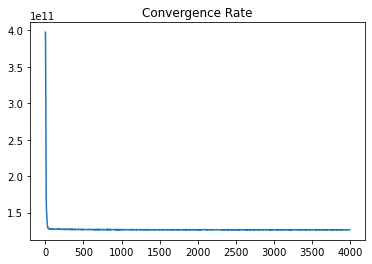

In [352]:
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
plt.show()

### A Method to Generate Data for Future

In [353]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

#### Evaluating model on training data (whole data this time)

In [354]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)

#### Generting Future Data and Predicting Future Cases

In [355]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

#### Evaluating metrics of trained ANN

In [356]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

22/22 [==============================] - 0s 1ms/step - loss: 126089928704.0000 - mean_absolute_error: 261006.4688


[126089928704.0, 261006.46875]

#### Dataframe of predicted cases on future data by proposed ANN

In [357]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

,Confirmed,Deaths,Recoveries
10/02/22,745654.8125,15237.058594,681604.2500
11/02/22,747194.3125,15274.200195,683080.8125
12/02/22,748726.3125,15311.245117,684551.2500
13/02/22,750251.0000,15348.188477,686015.5000
14/02/22,751768.3125,15385.038086,687473.8125
15/02/22,753278.0625,15421.786133,688925.8750
16/02/22,754780.5000,15458.432617,690371.3750
17/02/22,756275.1875,15494.973633,691810.7500


### Plotting Graphs

In [ ]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates, 
#          ann_future_model_prediction_on_training[:,0], '*b', 
#          ann_future_model_prediction_on_training[:,1], '*r', 
#          ann_future_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], fontsize=16)
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# plt.show()

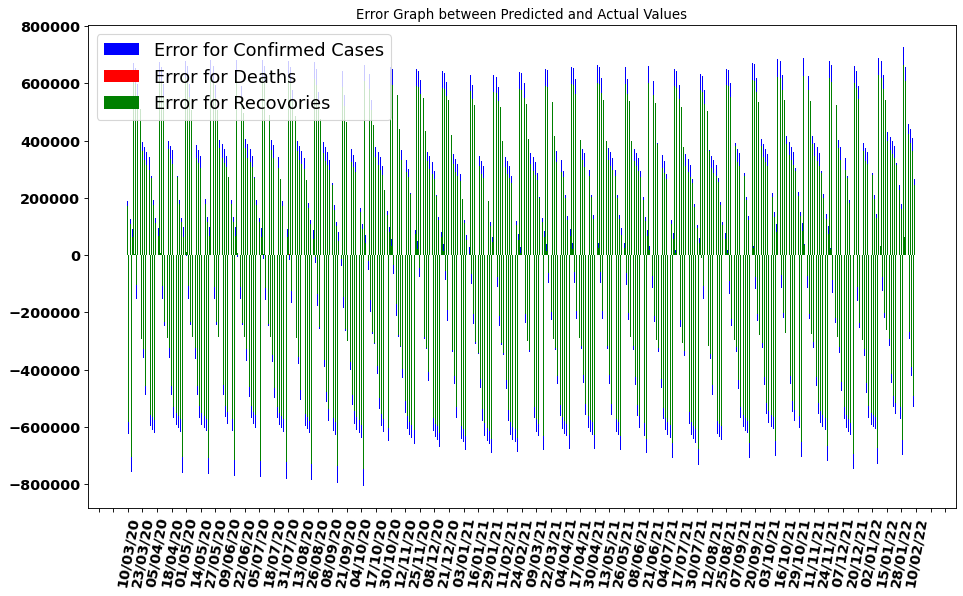

In [360]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

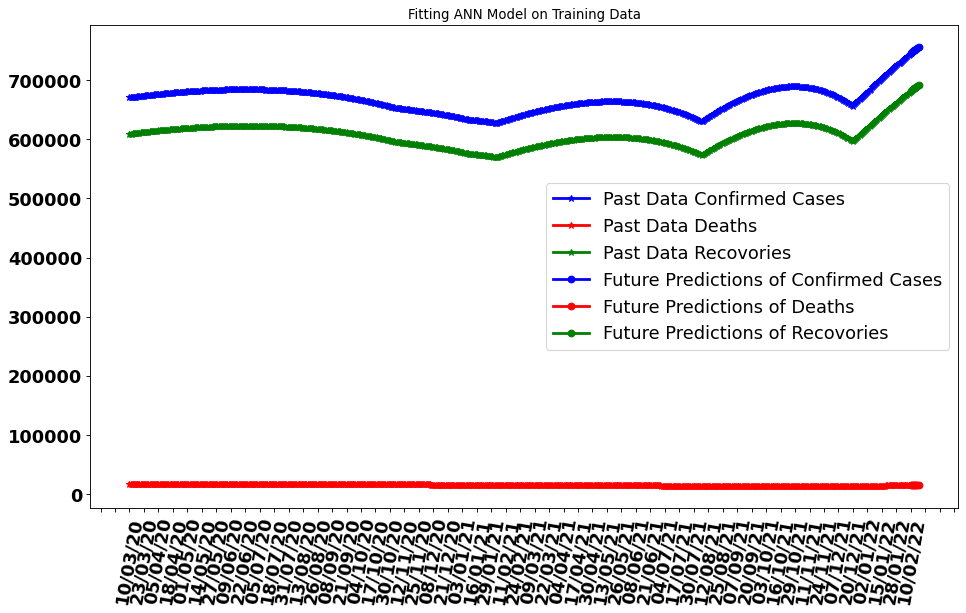

In [364]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()